
# *Table of Contents*

- [0. Context and Metadata](#0-context)  
- [1. EDA](#1-eda)  
- [2 Cleaning Inconsistencies](#2-cleaning)  
    -[2.1 Cleaning Brand](#2.1-brand)  
    -[2.2 Cleaning Model](#2.2-model)  
    -[2.3 Cleaning Transmission](#2.3-rest)  
    -[2.4 Cleaning Nonsense](#2.4-nonsense)  
- [3 Preprocessing](#3-preprocessing)  
    -[.1 Feature Engineering](#3.1-feature)  
    -[3.2 Splitting Train and Test](#3.2-train)  
    -[3.3 Cleaning Outliers](#3.3-outliers)  
    -[3.4 Filling Null](#3.4-nan)    
- [4 Modelling](#4-modelling)
    -[4.1 Splitting Cat From Num](#4.1-splitting)  
    -[4.2 Scaling Data](#4.2-scaler)  
    -[4.3 Feature Selection Cat](#4.3-featurecat)  
    -[4.4 Feature Selection Num](#4.4-featurenum)  
    -[4.5. Final Feature Selection](#4.5-finalfeature)  
    -[4.6. One hot Encoding](#4.6-encoding)    
    -[4.7 Start Modelling](#4.7-modelling)        
- [5 Test](#5-test)  
    -[5.1 Preprocess Test](#5.1-preprocesstest)  
    -[5.2 Prediction on test](#5.2-prediction)  
 

    
        
   


# 0. Context and Metadata <a class="anchor" id="0-context"></a>


`carID`. - An attribute that contains an identifier for each car.  
`Brand`. - The car’s main brand (e.g. Ford, Toyota)  
`model` - The car model  
`year` - The year of Registration of the Car  
`mileage` - The total reported distance travelled by the car (in miles)  
`tax` - The amount of road tax (in £) that, in 2020, was applicable to the car in question.  
`fuelType` - Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)  
`mpg` - Average Miles per Gallon  
`engineSize` - Size of Engine in liters (Cubic Decimeters)  
`paintQuality%` - The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).  
`previousOwners` - Number of previous registered owners of the vehicle.  
`hasDamage` - Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.  
`price` - The car’s price when purchased by Cars 4 You (in £).  


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math


from sklearn.model_selection import train_test_split


import scipy.stats as stats
from scipy.stats import chi2_contingency


from sklearn.svm import SVC
from sklearn.feature_selection import RFE



from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings('ignore')

RSEED = 42
np.random.seed(RSEED)
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score, mean_absolute_error



In [2]:
def load_data(filepath: str): 
    """
    Load any dataset from a CSV file into a pandas DataFrame.
    
    Args:
        filepath (str): Path to the CSV file
        
    Returns:
        pd.DataFrame: Loaded dataset
    """
    df = pd.read_csv(filepath)
    return df

In [3]:
df = load_data("train.csv") # load training set
df.T

,0,1,2,3,4,5,6,7,8,9,...,75963,75964,75965,75966,75967,75968,75969,75970,75971,75972
carID,69512,53000,6366,29021,10062,14704,6924,50783,67071,23348,...,67221,41090,16023,60263,44131,37194,6265,54886,860,15795
Brand,VW,Toyota,Audi,Ford,BMW,BMW,Audi,Skoda,VW,Ford,...,VW,Mercedes,Ford,Opel,Mercedes,Mercedes,Audi,Toyota,Audi,Ford
model,Golf,Yaris,Q2,FIESTA,2 Series,3 Series,A3,Octavia,Passat,Focus,...,T-Roc,GLC Class,EcoSport,Crossland X,GLC Class,C Class,Q3,Aygo,Q3,Fiesta
year,2016.0,2019.0,2019.0,2018.0,2019.0,2014.0,2017.0,2017.0,2017.0,2019.0,...,2020.0,2016.0,2017.0,2018.0,2018.0,2015.0,2013.0,2017.0,2015.0,2018.0
price,22290,13790,24990,12500,22995,8199,16089,7500,15999,15300,...,25785,24486,10498,13995,30495,13498,12495,8399,12990,10495
transmission,Semi-Auto,Manual,Semi-Auto,anual,Manual,anual,Manual,Manual,Semi-Auto,Manual,...,Semi-Auto,NaN,Manual,Manual,Semi-Auto,Manual,Semi-Auto,Automatic,Manual,Manual
mileage,28421.0,4589.0,3624.0,9102.0,1000.0,101153.348285,21396.0,116750.0,30339.0,10700.0,...,10.0,22955.0,13613.0,1800.0,11943.0,14480.0,52134.0,11304.0,69072.0,16709.0
fuelType,Petrol,Petrol,Petrol,Petrol,Petrol,Diesel,Petrol,Diesel,Diesel,Petrol,...,Petrol,Diesel,Petrol,Petrol,Diesel,etrol,Diesel,Petrol,iesel,Petro
tax,NaN,145.0,145.0,145.0,145.0,30.0,20.0,145.0,150.0,150.0,...,145.0,125.0,125.0,150.0,150.0,125.0,200.0,145.0,125.0,145.0
mpg,11.417268,47.9,40.9,65.7,42.8,65.7,60.1,68.9,62.8,60.1,...,39.8,56.5,88.32164,57.7,56.5,53.3,47.9,67.0,60.1,64.2


In [4]:
def get_unique_values(df):
    # Get unique values for each column as lists
    unique_values_dict = {column: df[column].unique().tolist() for column in df.columns}
    
    # Find the maximum length of unique values
    max_length = max(len(values) for values in unique_values_dict.values())
    
    # Determine padding value based on column type
    padded_dict = {}
    for column, values in unique_values_dict.items():
        # Check if column is numeric (int or float)
        if pd.api.types.is_numeric_dtype(df[column]):
            padding_value = np.nan
        else:
            padding_value = None
        # Pad the list to max_length
        padded_dict[column] = values + [padding_value] * (max_length - len(values))
    
    # Convert padded dictionary to DataFrame
    unique_df = pd.DataFrame(padded_dict)
    
    return unique_df

In [5]:
def get_unique_column_values(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame. Available columns: {list(df.columns)}")
    if pd.api.types.is_object_dtype(df[column_name]) or pd.api.types.is_string_dtype(df[column_name]):
        values = df[column_name].astype(str).str.strip().replace('nan', np.nan).unique()
    else:
        values = df[column_name].unique()
    return [x for x in values.tolist() if pd.notna(x) and x is not None]

In [6]:
get_unique_values(df).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           72 non-null     object 
 2   model           735 non-null    object 
 3   year            44 non-null     float64
 4   price           11048 non-null  float64
 5   transmission    40 non-null     object 
 6   mileage         34808 non-null  float64
 7   fuelType        34 non-null     object 
 8   tax             65 non-null     float64
 9   mpg             217 non-null    float64
 10  engineSize      58 non-null     float64
 11  paintQuality%   88 non-null     float64
 12  previousOwners  23 non-null     float64
 13  hasDamage       1 non-null      float64
dtypes: float64(9), int64(1), object(4)
memory usage: 8.1+ MB


# 1. Explorative Data Analysis <a class="anchor" id="1-eda"></a>

Numeric features to plot: ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']


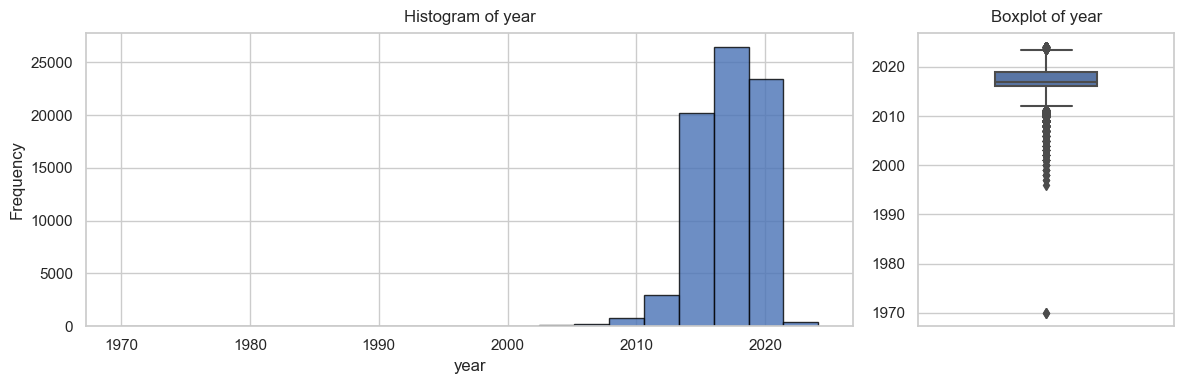

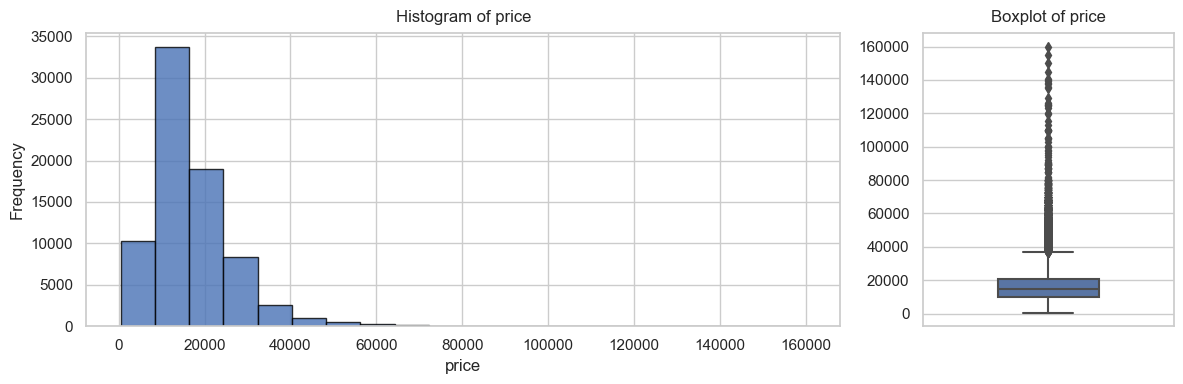

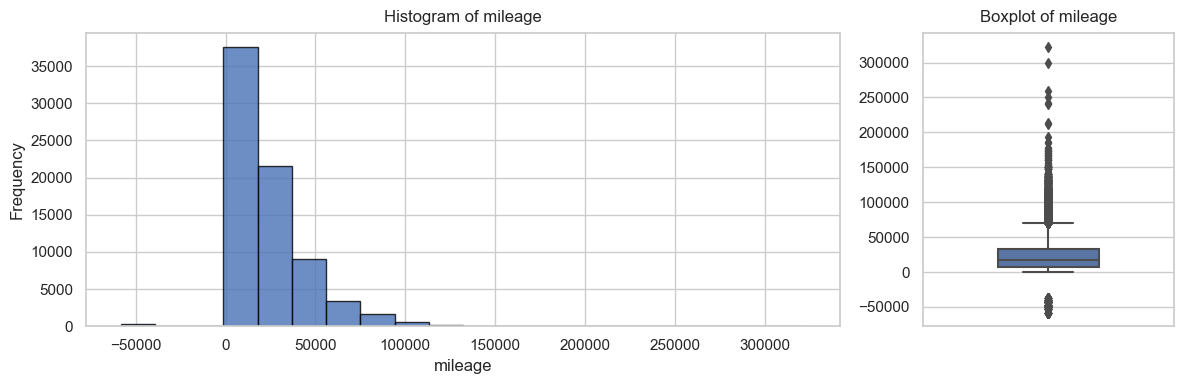

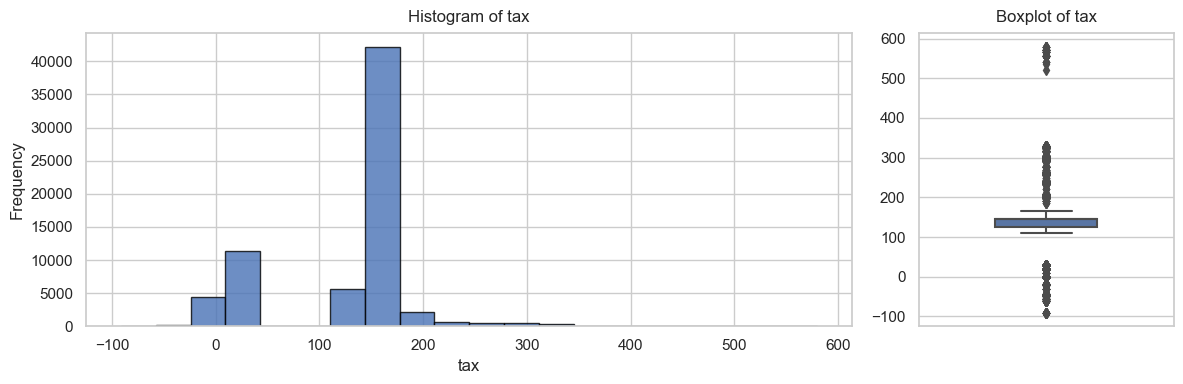

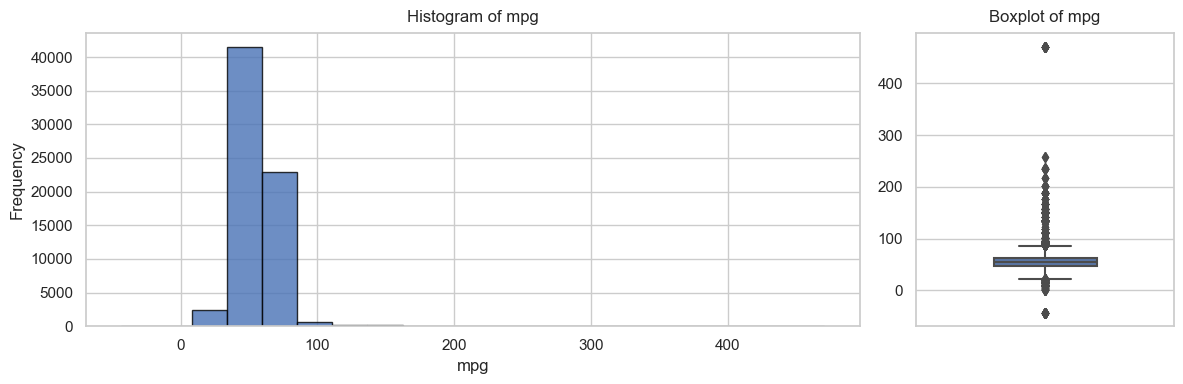

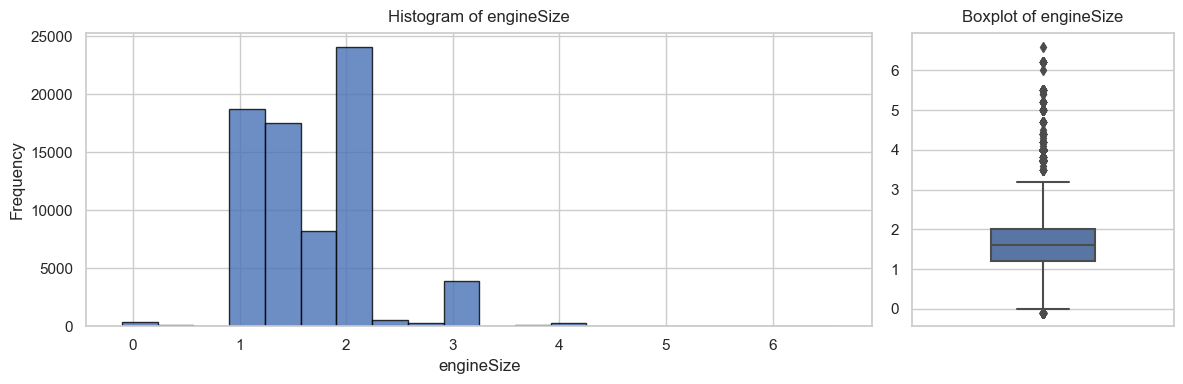

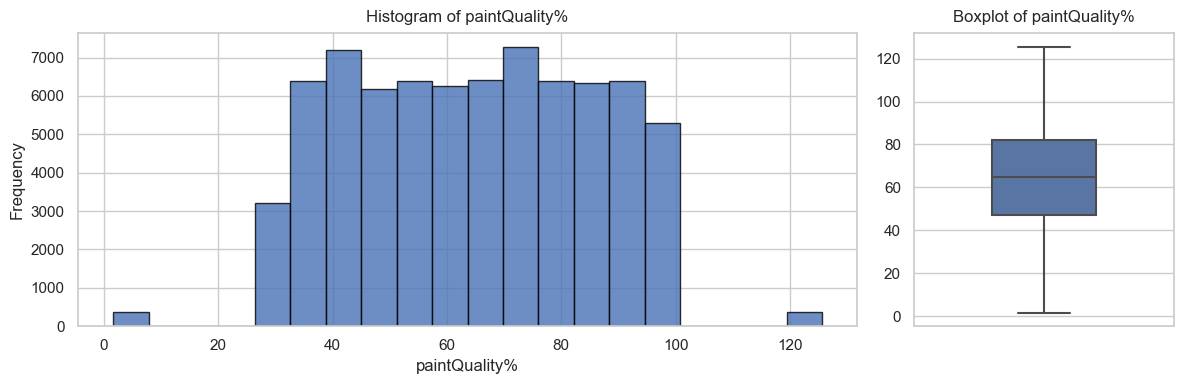

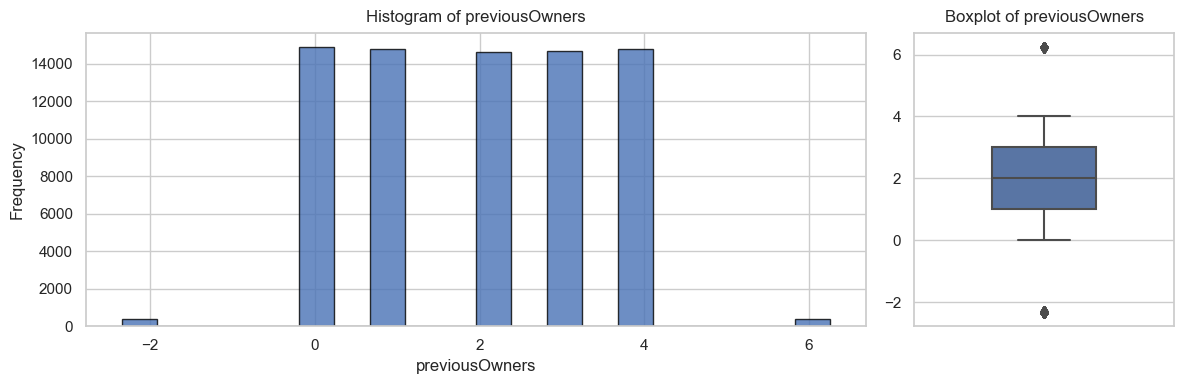

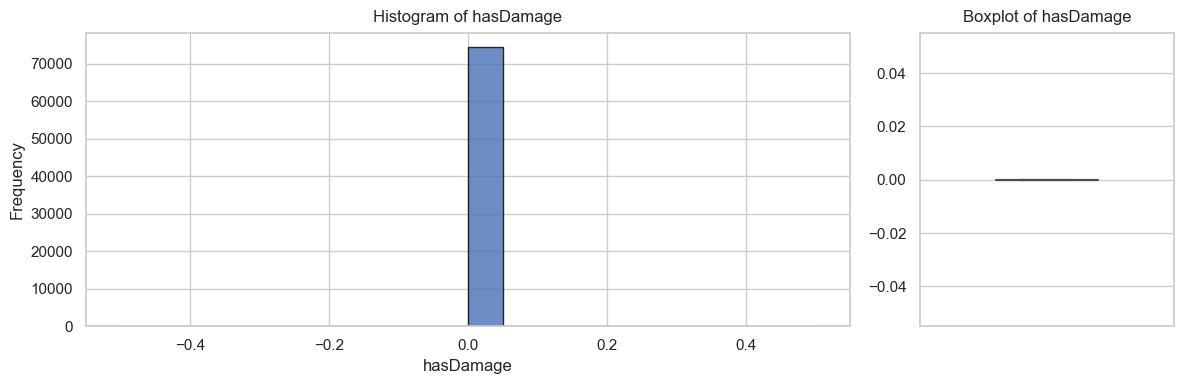

In [7]:
#1. Identify numeric columns & exclude the ones we don't want to analyse
exclude_cols = ["carID"]
metric_features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col not in exclude_cols
]

print(f"Numeric features to plot: {metric_features}")

#  2. Define plotting function 
def plot_hist_and_box(df, features, bins=20):
    sns.set_theme(style="whitegrid")  #aesthetics
    
    for feat in features:
        vals = df[feat].replace([np.inf, -np.inf], np.nan).dropna() 
        if len(vals) == 0:
            print(f"Skipping {feat}: no valid values.")
            continue

        # Create figure with histogram + boxplot
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 1]})
        
        # --- Histogram ---
        axes[0].hist(vals, bins=bins, color="#4972B6", edgecolor="black", alpha=0.8)
        axes[0].set_title(f"Histogram of {feat}", fontsize=12, pad=8)
        axes[0].set_xlabel(feat)
        axes[0].set_ylabel("Frequency")

        # --- Boxplot ---
        sns.boxplot(y=vals, ax=axes[1], color="#4C72B0", width=0.4)
        axes[1].set_title(f"Boxplot of {feat}", fontsize=12, pad=8)
        axes[1].set_ylabel("")
        
        # --- Layout and spacing ---
        plt.tight_layout()
        plt.show()

#  3. Run for all numeric features
plot_hist_and_box(df, metric_features, bins=20)

### Analysis:

Year: Concentrated between 2015–2020, left-skewed due to outliers from the 1970s. Outliers need handling.

Price: Right-skewed, centered around 10–20K, with extreme outliers up to ~160K.

Mileage: Contains impossible negative values; heavily concentrated at low values with high-end outliers.

Tax: Outliers on both ends and some negative (invalid) values.

MPG: A few impossible negatives; majority between 25–100, with upper-end outliers.

EngineSize: Includes invalid zeros and outliers above ~4.0.

PaintQuality: Contains invalid values >100; fairly uniform between 0–100, low 0–25 range underrepresented.

PreviousOwners: Invalid negatives; roughly uniform 0–4, with outliers at 6.

HasDamage: Constant (only 0); no predictive value for modeling.

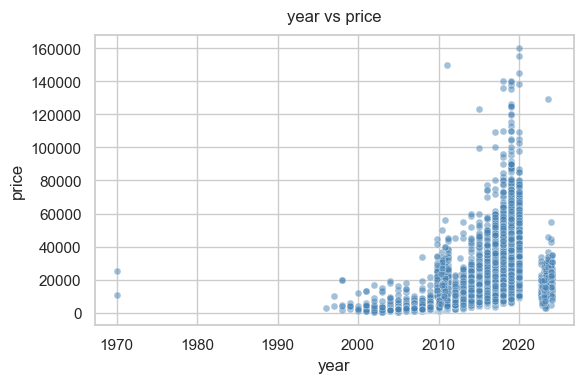

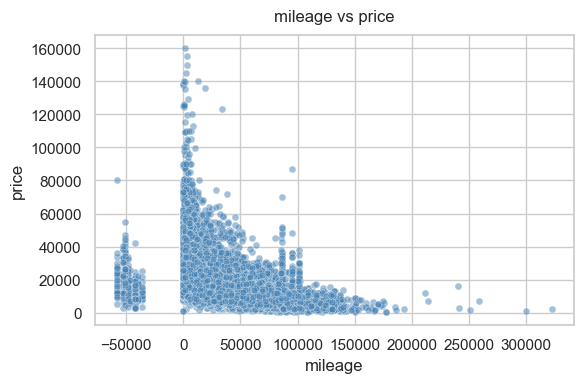

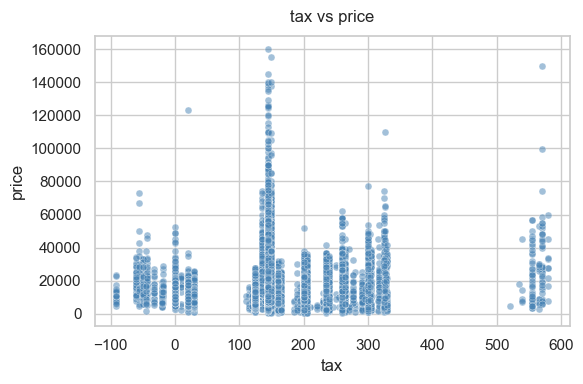

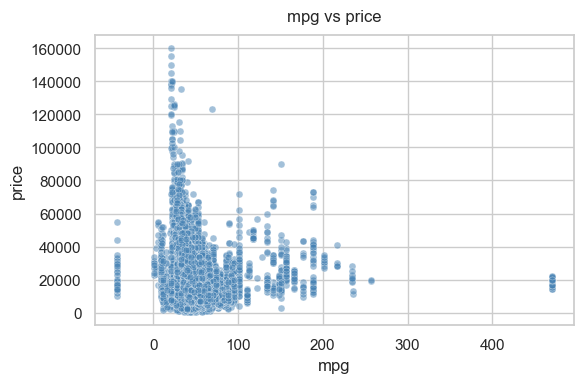

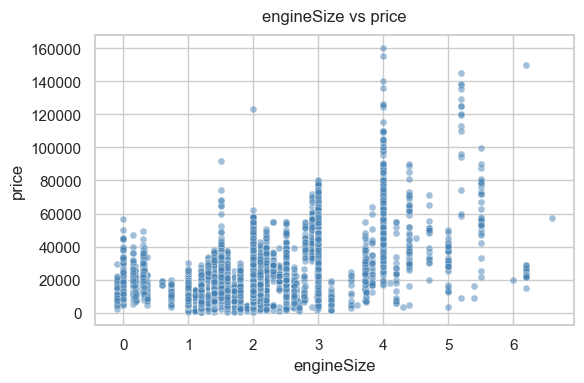

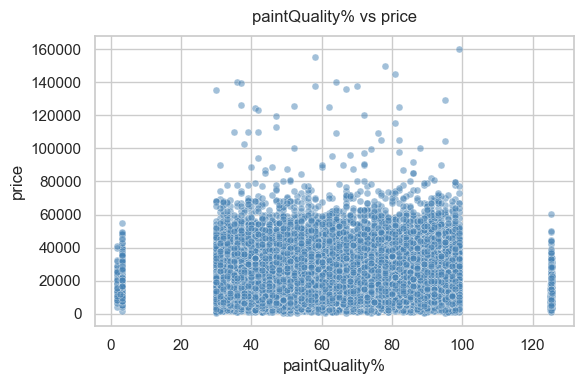

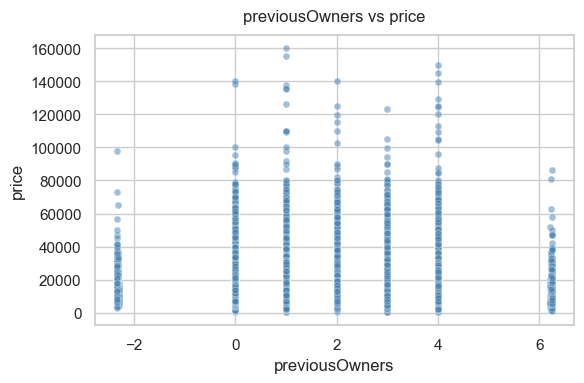

In [8]:
#Add HasDamage to excluded columns
exclude_cols = ["carID", "hasDamage"]
metric_features = [
    col for col in df.select_dtypes(include=[np.number]).columns
    if col not in exclude_cols
]

def plot_bivariate(df, features, target_col):
    """
    Plot scatter plots for each numeric feature vs a target variable.
    """
    sns.set_theme(style="whitegrid")

    for feat in features:
        if feat == target_col:
            continue  # Skip target itself

        # Drop NaNs and infinities
        data = df[[feat, target_col]].replace([np.inf, -np.inf], np.nan).dropna()
        if data.empty:
            continue

        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            data=data,
            x=feat,
            y=target_col,
            alpha=0.5,
            s=25,
            color="steelblue"
        )

        plt.title(f"{feat} vs {target_col}", fontsize=12, pad=10)
        plt.xlabel(feat)
        plt.ylabel(target_col)
        plt.tight_layout()
        plt.show()

# --- 3. Run bivariate analysis ---
# Example: analyze numeric features vs price
plot_bivariate(df, metric_features, target_col="price")

### Analysis:
Year vs price: Looks to the naked eye as a usefull value in predicting price. As year goes up price seems to go up as well.

Mileage vs price: Same as year but reversed. Mileage and year might be strongly negatively correlated, take into account for feature selection.

Tax vs price: Difficult to see a clear effect on price. The negative (impossible) values seem to have lower prices in general.

MPG vs price: MPG seems negatively correlated to price, the highest price segment is all in the low MPG segment.

Engine

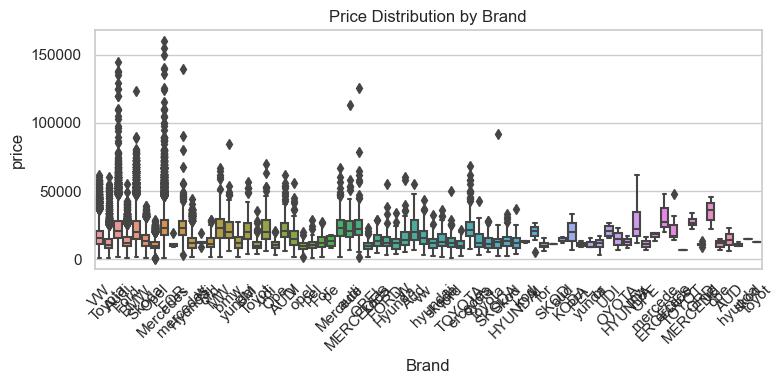

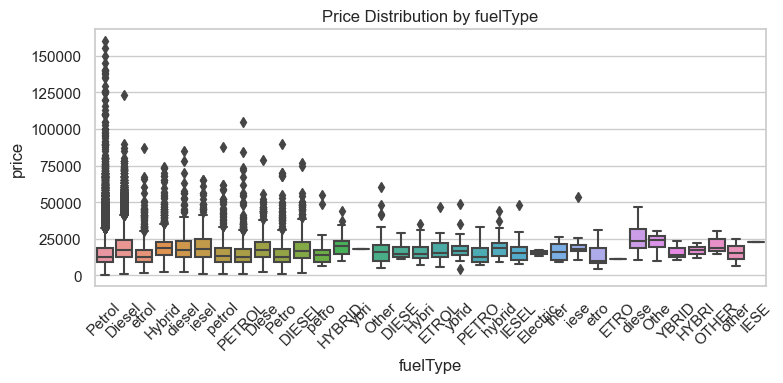

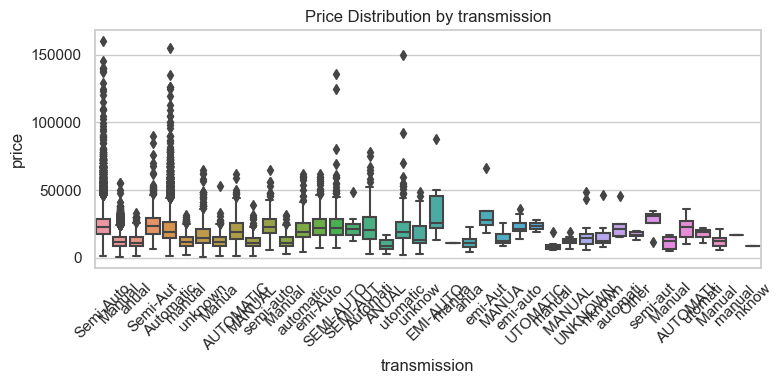

In [9]:
categorical_features = ['Brand', 'fuelType', 'transmission']

for cat in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=cat, y='price')
    plt.title(f"Price Distribution by {cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

From this analysis we can see that the Categorical Data is very messy and has to be cleaned before further analysis. 
There are a lot of different ways that the same value is spelled creating way more categories than there should be.

# 2. Cleaning Inconsistencies <a class="anchor" id="2-cleaning"></a>

In [10]:
df.set_index('carID', inplace = True)

# 2.1 Cleaning Brand <a class="anchor" id="21-brand"></a>

In [11]:
def clean_categorical(dirty_data, mapping, print_unique=False):
    """
    Clean a Pandas Series or iterable of categorical data using a mapping dictionary.
    
    Args:
        dirty_data: Pandas Series or iterable containing categorical values to clean.
        mapping: Dictionary mapping incorrect variations (lowercase) to standardized values.
        print_unique: Bool, if True, prints unique cleaned values (excluding None).
    
    Returns:
        pandas.Series or list: Cleaned data with same type as input (Series if input is Series, else list).
    
    Raises:
        ValueError: If dirty_data is not iterable, mapping is not provided, not a dictionary, or empty.
    """
    import pandas as pd

    # Validate inputs
    if dirty_data is None:
        raise ValueError("dirty_data must be provided")
    if mapping is None:
        raise ValueError("mapping must be provided")
    if not isinstance(mapping, dict):
        raise ValueError("mapping must be a dictionary")
    if not mapping:
        raise ValueError("mapping cannot be empty")
    
    # Check if dirty_data is iterable (excluding strings)
    try:
        iter(dirty_data)
        if isinstance(dirty_data, str):
            raise ValueError("dirty_data cannot be a string")
    except TypeError:
        raise ValueError("dirty_data must be a Pandas Series or iterable")

    # Handle Series input
    if isinstance(dirty_data, pd.Series):
        # Filter non-None values and convert to list
        non_none_values = [str(value).strip() for value in dirty_data if pd.notna(value)]
        # Clean values: map variations to correct values, keep unmapped values unchanged
        cleaned_values = [mapping.get(value.lower(), value) for value in non_none_values]
        # Create output Series, aligning with original index
        result = pd.Series(index=dirty_data.index, dtype=object)
        idx = 0
        for i, value in dirty_data.items():
            if pd.notna(value):
                result[i] = cleaned_values[idx]
                idx += 1
            else:
                result[i] = value  # Preserve None or np.nan
        # Print unique cleaned values if requested
        if print_unique:
            unique_cleaned = sorted(set(v for v in cleaned_values if pd.notna(v)))
            print("Unique cleaned values:", unique_cleaned)
        return result
    
    # Handle list/iterable input
    cleaned_values = []
    for value in dirty_data:
        if pd.notna(value):
            cleaned_value = mapping.get(str(value).strip().lower(), str(value).strip())
            cleaned_values.append(cleaned_value)
        else:
            cleaned_values.append(value)  # Preserve None or np.nan
    # Print unique cleaned values if requested
    if print_unique:
        unique_cleaned = sorted(set(v for v in cleaned_values if pd.notna(v)))
        print("Unique cleaned values:", unique_cleaned)
    return cleaned_values

In [12]:
# Dictionary mapping variations to correct brand names
brand_mapping = {
    'vw': 'Volkswagen', 'v': 'Volkswagen', 'w': 'Volkswagen',
    'toyota': 'Toyota', 'toyot': 'Toyota', 'oyota': 'Toyota', 'oyot' : 'Toyota',
    'audi': 'Audi', 'aud': 'Audi', 'udi': 'Audi', 'ud': 'Audi',
    'ford': 'Ford', 'for': 'Ford', 'ord': 'Ford', 'or': 'Ford',
    'bmw': 'BMW', 'mw': 'BMW', 'bm': 'BMW',
    'skoda': 'Skoda', 'skod': 'Skoda', 'koda': 'Skoda', 'kod': 'Skoda',
    'opel': 'Opel', 'ope': 'Opel', 'pel': 'Opel', 'pe': 'Opel',
    'mercedes': 'Mercedes', 'mercede': 'Mercedes', 'ercedes': 'Mercedes', 
    'ercede': 'Mercedes',
    'hyundai': 'Hyundai', 'hyunda': 'Hyundai', 'yundai': 'Hyundai', 'yunda': 'Hyundai'
}

df["Brand"] = clean_categorical(df["Brand"],brand_mapping) # clean brand
get_unique_values(df).info()
get_unique_column_values(df, "Brand")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34809 entries, 0 to 34808
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           9 non-null      object 
 1   model           735 non-null    object 
 2   year            44 non-null     float64
 3   price           11048 non-null  float64
 4   transmission    40 non-null     object 
 5   mileage         34808 non-null  float64
 6   fuelType        34 non-null     object 
 7   tax             65 non-null     float64
 8   mpg             217 non-null    float64
 9   engineSize      58 non-null     float64
 10  paintQuality%   88 non-null     float64
 11  previousOwners  23 non-null     float64
 12  hasDamage       1 non-null      float64
dtypes: float64(9), object(4)
memory usage: 3.5+ MB


['Volkswagen',
 'Toyota',
 'Audi',
 'Ford',
 'BMW',
 'Skoda',
 'Opel',
 'Mercedes',
 'Hyundai']

# 2.2 Cleaning Model <a class="anchor" id="22-model"></a>

In [13]:
get_unique_values(df).info()
#get_unique_column_values(df, "model")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34809 entries, 0 to 34808
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           9 non-null      object 
 1   model           735 non-null    object 
 2   year            44 non-null     float64
 3   price           11048 non-null  float64
 4   transmission    40 non-null     object 
 5   mileage         34808 non-null  float64
 6   fuelType        34 non-null     object 
 7   tax             65 non-null     float64
 8   mpg             217 non-null    float64
 9   engineSize      58 non-null     float64
 10  paintQuality%   88 non-null     float64
 11  previousOwners  23 non-null     float64
 12  hasDamage       1 non-null      float64
dtypes: float64(9), object(4)
memory usage: 3.5+ MB


In [14]:
# Define known model-to-brand mapping
model_to_brand = {
    # Volkswagen
    'Golf': 'Volkswagen',
    'Polo': 'Volkswagen',
    'Passat': 'Volkswagen',
    'Tiguan': 'Volkswagen',
    'T-Roc': 'Volkswagen',
    'T-Cross': 'Volkswagen',
    'Touran': 'Volkswagen',
    'Touareg': 'Volkswagen',
    'Sharan': 'Volkswagen',
    'Scirocco': 'Volkswagen',
    'Jetta': 'Volkswagen',
    'Beetle': 'Volkswagen',
    'Arteon': 'Volkswagen',
    'Amarok': 'Volkswagen',
    'Caddy': 'Volkswagen',
    'Caddy Maxi': 'Volkswagen',
    'Caddy Maxi Life': 'Volkswagen',
    'Caddy Life': 'Volkswagen',
    'Golf Sv': 'Volkswagen',
    'Tiguan Allspace': 'Volkswagen',
    'Eos': 'Volkswagen',
    'Cc': 'Volkswagen',
    'Fox': 'Volkswagen',
    'Shuttle': 'Volkswagen',
    'California': 'Volkswagen',
    'Caravelle': 'Volkswagen',
    'Up': 'Volkswagen',

    # Toyota
    'Yaris': 'Toyota',
    'Corolla': 'Toyota',
    'Auris': 'Toyota',
    'Aygo': 'Toyota',
    'Prius': 'Toyota',
    'Rav4': 'Toyota',
    'Land Cruiser': 'Toyota',
    'GT86': 'Toyota',
    'Supra': 'Toyota',
    'C-Hr': 'Toyota',
    'C-HR': 'Toyota',
    'Avensis': 'Toyota',
    'Verso': 'Toyota',
    'Verso-S': 'Toyota',
    'Camry': 'Toyota',
    'Hilux': 'Toyota',
    'Proace Verso': 'Toyota',
    'Urban Cruiser': 'Toyota',
    'IQ': 'Toyota',

    # Audi
    'A1': 'Audi',
    'A2': 'Audi',
    'A3': 'Audi',
    'A4': 'Audi',
    'A5': 'Audi',
    'A6': 'Audi',
    'A7': 'Audi',
    'A8': 'Audi',
    'Q2': 'Audi',
    'Q3': 'Audi',
    'Q5': 'Audi',
    'Q7': 'Audi',
    'Q8': 'Audi',
    'TT': 'Audi',
    'S3': 'Audi',
    'S4': 'Audi',
    'S5': 'Audi',
    'S8': 'Audi',
    'RS3': 'Audi',
    'RS4': 'Audi',
    'RS5': 'Audi',
    'RS6': 'Audi',
    'SQ5': 'Audi',
    'SQ7': 'Audi',
    'R8': 'Audi',

    # Ford
    'Fiesta': 'Ford',
    'Focus': 'Ford',
    'Kuga': 'Ford',
    'Mondeo': 'Ford',
    'EcoSport': 'Ford',
    'S-Max': 'Ford',
    'B-Max': 'Ford',
    'C-Max': 'Ford',
    'Grand C-Max': 'Ford',
    'Ka': 'Ford',
    'Ka+': 'Ford',
    'Mustang': 'Ford',
    'Edge': 'Ford',
    'Puma': 'Ford',
    'Ranger': 'Ford',
    'Escort': 'Ford',
    'Fusion': 'Ford',
    'Streetka': 'Ford',
    'Galaxy': 'Ford',
    'Tourneo Connect': 'Ford',
    'Tourneo Custom': 'Ford',
    'Grand Tourneo Connect': 'Ford',

    # BMW
    '1 Series': 'BMW',
    '2 Series': 'BMW',
    '3 Series': 'BMW',
    '4 Series': 'BMW',
    '5 Series': 'BMW',
    '6 Series': 'BMW',
    '7 Series': 'BMW',
    '8 Series': 'BMW',
    'X1': 'BMW',
    'X2': 'BMW',
    'X3': 'BMW',
    'X4': 'BMW',
    'X5': 'BMW',
    'X6': 'BMW',
    'X7': 'BMW',
    'Z3': 'BMW',
    'Z4': 'BMW',
    'M2': 'BMW',
    'M3': 'BMW',
    'M4': 'BMW',
    'M5': 'BMW',
    'M6': 'BMW',
    'I3': 'BMW',
    'I8': 'BMW',

    # Skoda
    'Octavia': 'Skoda',
    'Fabia': 'Skoda',
    'Rapid': 'Skoda',
    'Yeti': 'Skoda',
    'Yeti Outdoor': 'Skoda',
    'Superb': 'Skoda',
    'Scala': 'Skoda',
    'Kamiq': 'Skoda',
    'Kodiaq': 'Skoda',
    'Citigo': 'Skoda',
    'Roomster': 'Skoda',
    'Karoq': 'Skoda',

    # Opel / Vauxhall
    'Corsa': 'Opel',
    'Astra': 'Opel',
    'Insignia': 'Opel',
    'Mokka': 'Opel',
    'Mokka X': 'Opel',
    'Zafira': 'Opel',
    'Zafira Tourer': 'Opel',
    'Meriva': 'Opel',
    'Adam': 'Opel',
    'Crossland': 'Opel',
    'Crossland X': 'Opel',
    'Grandland': 'Opel',
    'Grandland X': 'Opel',
    'Viva': 'Opel',
    'Combo Life': 'Opel',
    'Antara': 'Opel',
    'Agila': 'Opel',
    'Ampera': 'Opel',
    'Cascada': 'Opel',
    'Vectra': 'Opel',
    'Gtc': 'Opel',
    'Tigra': 'Opel',
    'Vivaro': 'Opel',

    # Mercedes-Benz
    'A Class': 'Mercedes',
    'B Class': 'Mercedes',
    'C Class': 'Mercedes',
    'E Class': 'Mercedes',
    'S Class': 'Mercedes',
    'G Class': 'Mercedes',
    'Gla Class': 'Mercedes',
    'Glb Class': 'Mercedes',
    'Glc Class': 'Mercedes',
    'Gle Class': 'Mercedes',
    'Gls Class': 'Mercedes',
    'Sl Class': 'Mercedes',
    'Slk': 'Mercedes',
    'Clk': 'Mercedes',
    'Cls Class': 'Mercedes',
    'Cl Class': 'Mercedes',
    'Clc Class': 'Mercedes',
    'M Class': 'Mercedes',
    'X-Class': 'Mercedes',
    'V Class': 'Mercedes',
    'Cla Class': 'Mercedes',
    'Gl Class': 'Mercedes',

    # Hyundai
    'Tucson': 'Hyundai',
    'Santa Fe': 'Hyundai',
    'I10': 'Hyundai',
    'I20': 'Hyundai',
    'I30': 'Hyundai',
    'I40': 'Hyundai',
    'Ix20': 'Hyundai',
    'Ix35': 'Hyundai',
    'Kona': 'Hyundai',
    'Ioniq': 'Hyundai',
    'I800': 'Hyundai',
    'Getz': 'Hyundai',
    'Accent': 'Hyundai',
    'Terracan': 'Hyundai',
    'Veloster': 'Hyundai'
}

misspelling_model_corrections = {
    # Ford
    'fiesta': 'Fiesta',
    'fiest': 'Fiesta',
    'focu': 'Focus',
    'kug': 'Kuga',
    'monde': 'Mondeo',
    'ecospor': 'EcoSport',
    'b-ma': 'B-Max',
    'b max': 'B-Max',
    's-ma': 'S-Max',
    's max': 'S-Max',
    'c-ma': 'C-Max',
    'c max': 'C-Max',
    'grand c-ma': 'Grand C-Max',
    'grand c max': 'Grand C-Max',
    'grand tourneo connec': 'Grand Tourneo Connect',
    'tourneo custo': 'Tourneo Custom',
    'galax': 'Galaxy',
    'edg': 'Edge',
    'puma': 'Puma',
    'streetka': 'StreetKa',

    # Volkswagen
    'gol': 'Golf',
    'golf': 'Golf',
    'polo': 'Polo',
    'passa': 'Passat',
    'passat': 'Passat',
    't-ro':'T-Roc',
    't roc': 'T-Roc',
    'troc': 'T-Roc',
    't-roc': 'T-Roc',
    't ro': 'T-Roc',
    't rock': 'T-Roc',
    't cross': 'T-Cross',
    'tcross': 'T-Cross',
    't-cros': 'T-Cross',  # Added
    't cro': 'T-Cross',
    'tiguan allspac': 'Tiguan Allspace',
    'tiguan allspace': 'Tiguan Allspace',
    'tigua': 'Tiguan',
    'touare': 'Touareg',
    'toura': 'Touran',
    'touran': 'Touran',
    'shara': 'Sharan',
    'scirocc': 'Scirocco',
    'arteo': 'Arteon',
    'beetl': 'Beetle',
    'caravell': 'Caravelle',
    'caddy maxi lif': 'Caddy Maxi Life',
    'caddy maxi life': 'Caddy Maxi Life',
    'shuttle': 'Sharan',
    't': 'Up',
    'up': 'Up',
    'amaro': 'Amarok',  # Added
    'pol': 'Polo',      # Added

    # Toyota
    'yaris': 'Yaris',
    'yari': 'Yaris',
    'auris': 'Auris',
    'auri': 'Auris',
    'ayg': 'Aygo',
    'aygo': 'Aygo',
    'coroll': 'Corolla',
    'c-hr': 'C-HR',
    'c hr': 'C-HR',
    'c h': 'C-HR',
    'rav': 'RAV4',
    'land cruise': 'Land Cruiser',
    'urban cruise': 'Urban Cruiser',
    'hilu': 'Hilux',
    'vers': 'Verso',
    'verso s': 'Verso-S',
    'iq': 'IQ',

    # Opel / Vauxhall
    'astra': 'Astra',
    'astr': 'Astra',
    'corsa': 'Corsa',
    'cors': 'Corsa',
    'insignia': 'Insignia',
    'insigni': 'Insignia',
    'mokka': 'Mokka',
    'mokk': 'Mokka',
    'mokka x': 'Mokka X',
    'meriv': 'Meriva',
    'zafir': 'Zafira',
    'zafira toure': 'Zafira Tourer',
    'ada': 'Adam',
    'crossland x': 'Crossland X',
    'grandland x': 'Grandland X',
    'grandland': 'Grandland X',
    'viva': 'Viva',
    'combo lif': 'Combo Life',
    'gtc': 'GTC',
    'antara': 'Antara',
    'cascad': 'Cascada',
    'vivar': 'Vivaro',
    'viv': 'Vivaro',

    # Skoda
    'fabia': 'Fabia',
    'fabi': 'Fabia',
    'octavia': 'Octavia',
    'octavi': 'Octavia',
    'kodia': 'Kodiaq',
    'karo': 'Karoq',
    'karoq': 'Karoq',
    'kami': 'Kamiq',
    'kamiq': 'Kamiq',
    'citig': 'Citigo',
    'citigo': 'Citigo',
    'rapid': 'Rapid',
    'rapi': 'Rapid',
    'yeti outdoo': 'Yeti Outdoor',
    'yeti': 'Yeti',
    'yet': 'Yeti',
    'super': 'Superb',
    'scal': 'Scala',
    'roomste': 'Roomster',

    # Mercedes-Benz
    'a clas': 'A Class',
    'a class': 'A Class',
    'b clas': 'B Class',
    'b class': 'B Class',
    'c clas': 'C Class',
    'c class': 'C Class',
    'e clas': 'E Class',
    'e class': 'E Class',
    's clas': 'S Class',
    's class': 'S Class',
    'glc clas': 'GLC Class',
    'glc class': 'GLC Class',
    'gle clas': 'GLE Class',
    'gle class': 'GLE Class',
    'gls clas': 'GLS Class',
    'gls class': 'GLS Class',
    'cl clas': 'CL Class',
    'cl class': 'CL Class',
    'cla class': 'CLA Class',
    'cls clas': 'CLS Class',
    'cls class': 'CLS Class',
    'gl clas': 'GL Class',
    'gl class': 'GL Class',
    'glb clas': 'GLB Class',
    'glb class': 'GLB Class',
    'gla clas': 'GLA Class',
    'gla class': 'GLA Class',
    'm class': 'M Class',
    'm clas': 'M Class',
    'x-clas':'X-Class',
    'x-class': 'X-Class',
    'x class': 'X-Class',
    'x clas': 'X-Class',
    'v clas': 'V Class',
    'v class': 'V Class',
    'sl':'SL Class',
    'sl clas': 'SL Class',
    'sl class': 'SL Class',
    'slk': 'SLK',
    'clk': 'CLK',

    # Audi
    'a1': 'A1',
    'a2': 'A2',
    'a3': 'A3',
    'a4': 'A4',
    'a5': 'A5',
    'a6': 'A6',
    'a7': 'A7',
    'a8': 'A8',
    'q2': 'Q2',
    'q3': 'Q3',
    'q5': 'Q5',
    'q7': 'Q7',
    'q8': 'Q8',
    'tt': 'TT',
    's3': 'S3',
    's4': 'S4',
    's5': 'S5',
    'rs3': 'RS3',
    'rs4': 'RS4',
    'rs5': 'RS5',
    'rs6': 'RS6',
    'sq5': 'SQ5',
    'sq7': 'SQ7',
    'r8': 'R8',

    # BMW
    '1 series': '1 Series',
    '2 series': '2 Series',
    '3 series': '3 Series',
    '4 series': '4 Series',
    '5 series': '5 Series',
    '6 series': '6 Series',
    '7 series': '7 Series',
    '8 series': '8 Series',
    'x1': 'X1',
    'x2': 'X2',
    'x3': 'X3',
    'x4': 'X4',
    'x5': 'X5',
    'x6': 'X6',
    'x7': 'X7',
    'z3': 'Z3',
    'z4': 'Z4',
    'm2': 'M2',
    'm3': 'M3',
    'm4': 'M4',
    'm5': 'M5',
    'm6': 'M6',
    'i3': 'I3',
    'i8': 'I8',
    'ix2': 'IX20',
    'i': 'I10',
    'i10': 'I10',
    '1 serie': '1 Series',
    '2 serie': '2 Series',
    '3 serie': '3 Series',
    '4 serie': '4 Series',
    '5 serie': '5 Series',
    '6 serie': '6 Series',
    '7 serie': '7 Series',
    '8 serie': '8 Series',

    # Hyundai
    'tucso': 'Tucson',
    'tucson': 'Tucson',
    'santa f': 'Santa Fe',
    'i1': 'I10',
    'i2': 'I20',
    'i20': 'I20',
    'i30': 'I30',
    'i40': 'I40',
    'ix20': 'IX20',
    'ix35': 'IX35',
    'ioni': 'Ioniq',
    'i80': 'I800',
    'getz': 'Getz',
    'accent': 'Accent',
    'terracan': 'Terracan',
    'kon': 'Kona',    # Added
    'kona': 'Kona',   # Added
    'veloste': 'Veloster',  # Added
}





# Models to ignore during brand matching — too vague or incomplete to map reliably
unknown_models = {
    'A',      # Too vague; could be a typo for Audi A1–A8 or Mercedes A Class
    'Q',      # Too vague; likely a typo for Audi Q-series (Q2, Q3, Q5, etc.)
    'X',      # Too vague; could be BMW X-series (X1, X3, etc.) or Mercedes X-Class
    'K',      # Possibly a typo for Ford Kuga or Skoda Kodiaq
    'U',      # Possibly a typo for Volkswagen Up
    'Z',      # Possibly a typo for BMW Z3 or Z4
    'M',      # Could be BMW M-series (M2, M3, M4, etc.)
    'Golf S', # Likely a trim of Volkswagen Golf (e.g., Golf S), not a distinct model
    'Kadjar', # Renault Kadjar – not in our brand set
    'RS',     # Too vague; likely a typo for Audi RS model (e.g., RS3, RS4)
    '220',    # Possibly a trim or typo for Mercedes model (e.g., C220)
    '200',    # Possibly a trim or typo for Mercedes model (e.g., C200)
    '230',    # Possibly a trim or typo for Mercedes model (e.g., C230)
    'SL',     # Likely a typo for Mercedes SL Class, but incomplete
}


In [15]:
def match_car_models_df(df, 
                        model_column='model', 
                        brand_column='Brand', 
                        model_to_brand=None, 
                        misspelling_corrections=None, 
                        unknown_models=None):
    """
    Clean car model names, correct misspellings, fill missing brands using model lookup,
    and verify brand consistency.
    Strips leading/trailing spaces and converts model column to lowercase before processing.
    Adds a 'brand_match' column (1 if brand matches expected brand, 0 otherwise).
    Places 'brand_match' column immediately after 'model' column.

    Parameters:
    - df (pandas.DataFrame): Input DataFrame with model and brand columns.
    - model_column (str): Name of the column containing car models.
    - brand_column (str): Name of the column containing car brands.
    - model_to_brand (dict): Dictionary mapping model names to brand names.
    - misspelling_corrections (dict): Dictionary mapping misspelled model names to corrected model names.
    - unknown_models (set): Set of model names too vague or incomplete to map reliably.

    Returns:
    - pandas.DataFrame: DataFrame with cleaned models, filled brands, and 'brand_match' column.
    """
    

    #  1. Validate input
    if not isinstance(df, pd.DataFrame):
        raise ValueError("Input 'df' must be a pandas DataFrame.")
    if any(x is None for x in [model_to_brand, misspelling_corrections, unknown_models]):
        raise ValueError("model_to_brand, misspelling_corrections, and unknown_models must all be provided.")
    if not (isinstance(model_to_brand, dict) and isinstance(misspelling_corrections, dict) and isinstance(unknown_models, set)):
        raise ValueError("model_to_brand and misspelling_corrections must be dictionaries, and unknown_models must be a set.")
    if not model_to_brand or not misspelling_corrections or not unknown_models:
        raise ValueError("Input dictionaries/sets cannot be empty.")
    if model_column not in df.columns or brand_column not in df.columns:
        raise ValueError(f"Columns '{model_column}' or '{brand_column}' not found in DataFrame.")

    #  2. Normalize input datasets 
    normalized_model_to_brand = {k.strip().lower(): v.strip() for k, v in model_to_brand.items()}
    normalized_misspellings = {k.strip().lower(): v.strip() for k, v in misspelling_corrections.items()}
    normalized_unknown_models = {m.strip().lower() for m in unknown_models}

    #  3. Strip spaces and convert model column to lowercase 
    result_df = df.copy()
    result_df[model_column] = result_df[model_column].str.strip().str.lower()

    #  4. Clean model names 
    def clean_model_name(model):
        if pd.isna(model):
            return np.nan
        # Return corrected model name from misspelling_corrections or the input model
        return normalized_misspellings.get(model, model)

    #  5. Apply cleaning (vectorized) 
    result_df[model_column] = result_df[model_column].map(clean_model_name)

    # 6. Debug unmatched models 
    unmatched_models = set(result_df[model_column][result_df[model_column].notna()].str.lower()) - set(normalized_misspellings.values()) - set(normalized_unknown_models)
    if unmatched_models:
        print(f"Debug: Unmatched models after cleaning: {unmatched_models}")

    #  7. Fill missing brands and set brand_match 
    def get_brand_match(row):
        model = row[model_column]
        brand = row[brand_column]
        # If model is missing, brand_match = 0
        if pd.isna(model):
            return pd.Series([brand, 0])
        # If model is unknown, brand_match = 0
        if model.lower() in normalized_unknown_models:
            return pd.Series([brand, 0])
        # Get expected brand from model_to_brand
        expected_brand = normalized_model_to_brand.get(model.lower())
        # If model not in model_to_brand, brand_match = 0
        if expected_brand is None:
            return pd.Series([brand, 0])
        # Fill missing brand if applicable
        if pd.isna(brand) or str(brand).strip() == '':
            brand = expected_brand
        # Set brand_match: 1 if brands match, 0 otherwise
        brand_match = 1 if str(brand).lower() == str(expected_brand).lower() else 0
        return pd.Series([brand, brand_match])

    # Apply brand filling and brand_match
    result_df[[brand_column, 'brand_match']] = result_df.apply(get_brand_match, axis=1)

    #  8. Reorder columns (place brand_match right after model_column) 
    cols = list(result_df.columns)
    cols.remove('brand_match')
    insert_pos = cols.index(model_column) + 1
    cols.insert(insert_pos, 'brand_match')
    result_df = result_df[cols]

    return result_df

In [16]:
df = match_car_models_df(
    df,
    model_column='model',
    brand_column='Brand',
    model_to_brand=model_to_brand,
    misspelling_corrections=misspelling_model_corrections,
    unknown_models=unknown_models
) # clean the model

Debug: Unmatched models after cleaning: {'iq', 'rav4', '4 series', 'fox', 'supra', 'a2', 'focus', 'combo life', 't-cross', 'x3', 'c-h', 'b-max', 'caddy maxi', 'kona', 'a7', 'sl class', 'getz', 'streetka', 't-roc', 'puma', 'm6', 'beetle', 'zafira tourer', 'california', 'x6', 'fusion', 's class', 'i10', 'a5', 'tt', 'scirocco', 'kamiq', 'q2', 'gt86', 'c class', 'r8', 'x4', 'jetta', 'sq7', 'x5', 'arteon', 'land cruiser', 'i40', 'gla class', 'passat', 'fiesta', 'astra', 'gl class', 'i800', 'tourneo connect', 'i20', 'c-hr', 'sq5', 'superb', 's4', 'golf sv', 'tigra', 'a3', 'q3', 'fabia', 'cc', 'yeti outdoor', 'i8', 'polo', 'a6', 'x-class', 'x7', 'rs6', 'santa fe', 'corolla', 'yeti', 'agila', 'a class', 'g class', 'gle class', 's5', 'hilux', 'glb class', 'ka', 'clc class', 'c-max', 'm5', 'z4', 'a4', 'proace verso', 'roomster', 'b class', 'vivaro', 'sharan', 'm4', 'caddy', '7 series', 'ka+', '3 series', 'verso', 'edge', 'mustang', 'tucson', 'amarok', 'kuga', 'aygo', 'rs3', 'crossland x', '2 ser

In [17]:


df.to_csv('dataset2.csv', index=False)

# 2.3 Cleaning Rest of Columns <a class="anchor" id="23-rest"></a>

In [18]:
get_unique_column_values(df, "transmission")


['Semi-Auto',
 'Manual',
 'anual',
 'Semi-Aut',
 'Automatic',
 'manual',
 'unknown',
 'Manua',
 'AUTOMATIC',
 'MANUAL',
 'semi-auto',
 'automatic',
 'emi-Auto',
 'SEMI-AUTO',
 'SEMI-AUT',
 'Automati',
 'ANUAL',
 'utomatic',
 'unknow',
 'EMI-AUTO',
 'manua',
 'anua',
 'emi-Aut',
 'MANUA',
 'emi-auto',
 'UTOMATIC',
 'UNKNOWN',
 'nknown',
 'automati',
 'Other',
 'semi-aut',
 'AUTOMATI',
 'utomati',
 'nknow']

In [19]:
def clean_vehicle_dataframe(df):
    """
    Cleans and normalizes vehicle dataset values across all key columns.
    """

    import numpy as np
    import pandas as pd
    import math

    #  Clean 'year' 
    def clean_year(series):
        return series.apply(lambda x: int(round(x)) if pd.notnull(x) else np.nan) # make year into a int instead of 2014.5

    #  Clean 'transmission'
    transmission_map = {
        'anual': 'Manual', 'ANUAL': 'Manual', 'anua': 'Manual', 'Manua': 'Manual', 'manua': 'Manual', 'MANUA': 'Manual', ' Manual ' : 'Manual',
        'manual': 'Manual', 'MANUAL': 'Manual', ' Manual ': 'Manual', ' Manual' : 'Manual', 'Manual ': 'Manual', 'Manual ': 'Manual', 
        'Semi-Auto': 'Semi-Auto', 'semi-auto': 'Semi-Auto', 'Semi-Aut': 'Semi-Auto', 'SEMI-AUTO': 'Semi-Auto',
        'SEMI-AUT': 'Semi-Auto', 'emi-Auto': 'Semi-Auto', 'emi-Aut': 'Semi-Auto', 'emi-auto': 'Semi-Auto',
        'EMI-AUTO': 'Semi-Auto', 'semi-aut': 'Semi-Auto',
        'Automatic': 'Automatic', 'AUTOMATIC': 'Automatic', 'automati': 'Automatic', 'Automati': 'Automatic',
        'utomatic': 'Automatic', 'UTOMATIC': 'Automatic', 'AUTOMATI': 'Automatic', 'utomati': 'Automatic', 'automatic' : 'Automatic',
        'Other': 'Other', 
        'unknown': 'Unknown', 'unknow': 'Unknown', 'UNKNOWN': 'Unknown', 'nknow': 'Unknown', 'nknown': 'Unknown'
    }
    def clean_transmission(series):
        return series.apply(lambda x: transmission_map.get(str(x).strip(), x)) #after mapping differnet options

    #  Clean 'mileage' 
    def clean_mileage(series):
        return series.apply(lambda x: int(abs(math.floor(x))) if pd.notnull(x) else np.nan) # don´t allow for negative numbers in mileage

    # Clean 'fuelType' 
    fuel_map = {
        'Petrol': 'Petrol', 'petrol': 'Petrol', 'PETROL': 'Petrol', 'petro': 'Petrol', 'Petro': 'Petrol',
        'PETRO': 'Petrol', 'etro': 'Petrol', 'ETRO': 'Petrol', 'etrol': 'Petrol', 'ETROL': 'Petrol',
        'Diesel': 'Diesel', 'diesel': 'Diesel', 'DIESEL': 'Diesel', 'DIESE': 'Diesel', 'Diese': 'Diesel',
        'IESEL': 'Diesel', 'iese': 'Diesel', 'IESE': 'Diesel', 'diese': 'Diesel', 'iesel': 'Diesel',
        'Hybrid': 'Hybrid', 'HYBRID': 'Hybrid', 'hybrid': 'Hybrid', 'Hybri': 'Hybrid', 'ybri': 'Hybrid',
        'ybrid': 'Hybrid', 'YBRID': 'Hybrid', 'HYBRI': 'Hybrid', 'hybri' : 'Hybrid',
        'Electric': 'Electric',
        'Other': 'Other', 'other': 'Other', 'Othe': 'Other', 'ther': 'Other', 'OTHER': 'Other'
    }
    def clean_fuel(series):
        return series.apply(lambda x: fuel_map.get(str(x).strip(), x)) # get correct

    #  Clean 'tax'
    def clean_tax(series):
        return series.apply(lambda x: int(abs(round(x))) if pd.notnull(x) else np.nan) # again don´t allow for negative numbers

    #  Clean 'mpg' 
    def clean_mpg(series):
        return series.apply(lambda x: abs(round(x, 1)) if pd.notnull(x) else np.nan) #don´t allow for negative numbers

    #  Clean 'engineSize' 
    def clean_engine(series):
        def round_engine(x):
            if pd.isnull(x): return np.nan
            base = math.floor(x * 10) / 10.0
            if x - base >= 0.05:
                base += 0.1
            return round(base, 1)
        return series.apply(lambda x: round_engine(abs(x)))

    #  Clean 'paintQuality%' 
    def clean_paint(series):
        return series.apply(lambda x: int(round(abs(x))) if pd.notnull(x) else np.nan) # dont allow for negative numbers

    #  Clean 'previousOwners'
    def clean_owners(series):
        return series.apply(lambda x: int(round(abs(x))) if pd.notnull(x) else np.nan) # dont allow for negative and needs to be an integer

    #  Clean 'price' 
    def clean_price(series):
        def format_price(x):
            if pd.isnull(x): 
                return np.nan
            x = abs(x)
            return float(int(round(x)))  # removes cents, e.g., 100.99 → 100.0
        return series.apply(format_price)

    # === Apply all cleaning functions ===
    df = df.copy()
    if 'year' in df.columns:
        df['year'] = clean_year(df['year'])
    if 'price' in df.columns:
        df['price'] = clean_price(df['price'])
    if 'transmission' in df.columns:
        df['transmission'] = clean_transmission(df['transmission'])
    if 'mileage' in df.columns:
        df['mileage'] = clean_mileage(df['mileage'])
    if 'fuelType' in df.columns:
        df['fuelType'] = clean_fuel(df['fuelType'])
    if 'tax' in df.columns:
        df['tax'] = clean_tax(df['tax'])
    if 'mpg' in df.columns:
        df['mpg'] = clean_mpg(df['mpg'])
    if 'engineSize' in df.columns:
        df['engineSize'] = clean_engine(df['engineSize'])
    if 'paintQuality%' in df.columns:
        df['paintQuality%'] = clean_paint(df['paintQuality%'])
    if 'previousOwners' in df.columns:
        df['previousOwners'] = clean_owners(df['previousOwners'])

    return df


In [20]:
df = clean_vehicle_dataframe(df)


# 2.4 Cleaning Nonsense <a class="anchor" id="24-nonsense"></a>

In [21]:
df.describe(include = 'all')
# paint quality max is over 100% we need to adapt this
# we also have to look at engine size and hasDamage
# maybe we can try hasDamage when NaN = hasDamage




,Brand,model,brand_match,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75933,74456,75973.000000,74482.000000,75973.000000,74451,74510.000000,74462,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
unique,9,241,NaN,NaN,NaN,8,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Ford,focus,NaN,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN
freq,16384,6775,NaN,NaN,NaN,41238,NaN,41181,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.977018,2017.096788,16881.889553,NaN,23470.107328,NaN,120.840956,55.198486,1.660340,64.589786,2.014982,0.0
std,NaN,NaN,0.149847,2.206001,9736.926322,NaN,21635.008199,NaN,64.565283,16.343515,0.572556,21.020589,1.437389,0.0
min,NaN,NaN,0.000000,1970.000000,450.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000,2.000000,0.000000,0.0
25%,NaN,NaN,1.000000,2016.000000,10200.000000,NaN,7612.000000,NaN,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,NaN,NaN,1.000000,2017.000000,14699.000000,NaN,17530.000000,NaN,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,NaN,NaN,1.000000,2019.000000,20950.000000,NaN,32831.500000,NaN,145.000000,62.800000,2.000000,82.000000,3.000000,0.0


In [22]:
# we assume that max painting is only 100% so we put the values back to this
clean_max_paintquality = df['paintQuality%'] > 100
df.loc[clean_max_paintquality, 'paintQuality%'] = 100
df.describe()



,brand_match,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,0.977018,2017.096788,16881.889553,23470.107328,120.840956,55.198486,1.660340,64.465795,2.014982,0.0
std,0.149847,2.206001,9736.926322,21635.008199,64.565283,16.343515,0.572556,20.735217,1.437389,0.0
min,0.000000,1970.000000,450.000000,1.000000,0.000000,1.100000,0.000000,2.000000,0.000000,0.0
25%,1.000000,2016.000000,10200.000000,7612.000000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,1.000000,2017.000000,14699.000000,17530.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,1.000000,2019.000000,20950.000000,32831.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,1.000000,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,100.000000,6.000000,0.0


In [23]:
#clean fueltype 'other' is not a valid option

clean_fueltype = df['fuelType'] == 'Other'
df.loc[clean_fueltype, 'fuelType'] = np.nan

In [24]:
# so we dont have 2014.5
df['year'] = np.floor(df['year'])

In [25]:
# we turned when engineSize = 0 to null so then we can impute the median for the specific model as we can´t have no engine in a car


clean_engine_size = df['engineSize'] == 0
df.loc[clean_engine_size, 'engineSize'] = np.nan








# 3. Preprocessing <a class="anchor" id="3-preprocessing"></a>

# 3.1 Feature Engineering <a class="anchor" id="31-feature"></a>

In [26]:

## Creation of age
ref_year = 2024
df['age'] = ref_year - df['year']

In [27]:
### Creation of log for mileage as it is extremely right_skewed
df['log_mileage'] = np.log(df['mileage'])


In [28]:
# preencher NAN's da coluna hasDamage com 1

df['hasDamage'] = df['hasDamage'].fillna(1)

# 3.2 Splitting Train, Test <a class="anchor" id="32-train"></a>

In [29]:
X = df.drop(['price', 'brand_match'], axis = 1) # defining X
y = df['price'] #defining y

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  shuffle = True) #making the split


# 3.3 Cleaning Outliers <a class="anchor" id="33-outliers"></a>

In [31]:
#function to clean otliers
def cleaning_outliers(training_set, val_set):
    X_train = training_set.copy() 
    X_val = val_set.copy()
    num_cols = X_train.select_dtypes(include=np.number).columns # get outliers for numeric columns
    for col in num_cols:
        q1 = X_train[col].quantile(0.25) # using the formula q1 -1.5iqr and q3 + 1.5iqr
        q3 = X_train[col].quantile(0.75)
        iqr = q3 -q1
        lower = q1 -1.5 * iqr
        larger = q3 + 1.5 * iqr
        # we will set to this value when outliers exist
        X_train.loc[X_train[col] < lower, col] = lower
        X_train.loc[X_train[col] > larger, col] = larger
        X_val.loc[X_val[col] < lower, col] = lower
        X_val.loc[X_val[col] > larger, col] = larger
    return X_train, X_val

X_train, X_val = cleaning_outliers(X_train, X_val)


# 3.4 Cleaning NaN <a class="anchor" id="34-nan"></a>

In [32]:
# we will clean brand 
#Important to mention that to fill NaN only training data will be used
get_mode = lambda s: s.mode().iat[0] if not s.mode().empty else np.nan

by_model_transmission_year_clean_brand = (
    X_train.dropna(subset=['Brand','model','transmission','year'])
           .groupby(['model','transmission','year'])['Brand']
           .agg(get_mode) # starting by filling null brand if possible with the mode for the model, transmission and year
)

by_model_transmission_clean_brand = (
    X_train.dropna(subset=['Brand','model','transmission'])
           .groupby(['model','transmission'])['Brand']
           .agg(get_mode) # second option to fill brand with only model and transmission
)

by_year_transmission_clean_brand = (
    X_train.dropna(subset=['Brand','transmission','year'])
           .groupby(['transmission','year'])['Brand']
           .agg(get_mode) # third option filling with transmission and year

)
by_transmission_clean_brand = X_train.dropna(subset=['Brand','transmission']).groupby(['transmission'])['Brand'].agg(get_mode) # filling with
# transmission only

by_year_clean_brand = X_train.dropna(subset=['Brand','year']).groupby(['year'])['Brand'].agg(get_mode)
# last option fill with year
def fill_brand_using_train_maps(df, by_model_transmission_year, by_model_transmission, by_year_transmission, by_transmission, by_year):
    '''
    Function to apply the above options to fill brand
    '''
    df = df.copy()
    mask = df['Brand'].isna()

    # Pass 1: model + transmission + year
    fill1 = (df.loc[mask, ['model','transmission','year']]
               .merge(by_model_transmission_year.rename('fill'),
                      how='left',
                      left_on=['model','transmission','year'],
                      right_index=True)['fill'])
    df.loc[mask, 'Brand'] = fill1.to_numpy()

    # Pass 2: model + transmission
    mask = df['Brand'].isna()
    fill2 = (df.loc[mask, ['model','transmission']]
               .merge(by_model_transmission.rename('fill'),
                      how='left',
                      left_on=['model','transmission'],
                      right_index=True)['fill'])
    df.loc[mask, 'Brand'] = fill2.to_numpy()

    # Pass 3: transmission + year
    mask = df['Brand'].isna()
    fill3 = (df.loc[mask, ['transmission','year']]
               .merge(by_year_transmission.rename('fill'),
                      how='left',
                      left_on=['transmission','year'],
                      right_index=True)['fill'])
    df.loc[mask, 'Brand'] = fill3.to_numpy()

    mask = df['Brand'].isna()
    fill4 = (df.loc[mask, ['transmission']]
               .merge(by_transmission.rename('fill'),
                      how='left',
                      left_on=['transmission'],
                      right_index=True)['fill'])
    df.loc[mask, 'Brand'] = fill4.to_numpy()
              
    mask = df['Brand'].isna()
    fill5 = (df.loc[mask, ['year']]
               .merge(by_year.rename('fill'),
                      how='left',
                      left_on=['year'],
                      right_index=True)['fill'])
    df.loc[mask, 'Brand'] = fill5.to_numpy()

    return df

# filling both X_train and X_test with data
X_train = fill_brand_using_train_maps(X_train,
                                      by_model_transmission_year_clean_brand,
                                      by_model_transmission_clean_brand,
                                      by_year_transmission_clean_brand, by_transmission_clean_brand, by_year_clean_brand)

X_val   = fill_brand_using_train_maps(X_val,
                                      by_model_transmission_year_clean_brand,
                                      by_model_transmission_clean_brand,
                                      by_year_transmission_clean_brand, by_transmission_clean_brand, by_year_clean_brand)






In [33]:
# filling model now

by_brand_year_clean_model = (X_train.dropna(subset=['Brand','year','model'])
                   .groupby(['Brand','year'])['model']
                   .agg(get_mode)) # first option to fill model will be brand, year  mode

# Brand -> model map (fallback, learned on train)
by_brand_clean_model = (X_train.dropna(subset=['Brand','model'])
              .groupby('Brand')['model']
              .agg(get_mode)) # second option only brand

def fill_model_using_train_maps(df, by_brand_year, by_brand):
    '''
    Function to fill model with the options above created
    '''
    df = df.copy()
    mask = df['model'].isna()

    # Brand+year
    fill1 = (df.loc[mask, ['Brand','year']]
               .merge(by_brand_year.rename('fill'),
                      how='left', left_on=['Brand','year'], right_index=True)['fill'])
    df.loc[mask, 'model'] = fill1.to_numpy()

    # Brand-only
    mask = df['model'].isna()
    df.loc[mask, 'model'] = df.loc[mask, 'Brand'].map(by_brand)

    return df
# filling both X_train and X_val
X_train = fill_model_using_train_maps(X_train, by_brand_year_clean_model, by_brand_clean_model)
X_val   = fill_model_using_train_maps(X_val,   by_brand_year_clean_model, by_brand_clean_model)


In [34]:
get_median = lambda s: s.median(skipna=True) if s.notna().any() else np.nan # get median function

# Filling NaNs in the year
by_brand_model_clean_year = (X_train.groupby(['Brand','model'])['year']
                   .agg(get_median)) # use the median for brand and model to fill the year as we are doing this after filling brand and model we wont have NaNs
def fill_year_using_train_maps(df, by_brand_model):
    '''
    Function to fill the year
    '''
    df = df.copy()
    mask = df['year'].isna()

    fill1 = (df.loc[mask, ['Brand','model']]
               .merge(by_brand_model.rename('fill'),
                      how='left', left_on=['Brand','model'], right_index=True)['fill'])
    df.loc[mask, 'year'] = fill1.to_numpy()

    return df
# filling both X_train and X_val
X_train = fill_year_using_train_maps(X_train, by_brand_model_clean_year)
X_val   = fill_year_using_train_maps(X_val, by_brand_model_clean_year)




In [35]:
### now lets clean transmission
by_brand_model_year_clean_transmission = (X_train.dropna(subset = 'transmission').groupby(['Brand','model','year'])['transmission']
                   .agg(get_mode)) # starting with the mode for brand, model and year
by_brand_model_clean_transmission = (X_train.dropna(subset = 'transmission').groupby(['Brand','model'])['transmission']
                   .agg(get_mode)) # now only brand and model

def fill_transmission_using_train_maps(df, by_brand_model_year, by_brand_model):

    ''' 
    Function to fill transmission NaNs
    '''
    df = df.copy()
    mask = df['transmission'].isna()

    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'transmission'] = fill1.to_numpy()
    mask = df['transmission'].isna()
    
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'transmission'] = by_brand_model.reindex(keys).to_numpy()
    return df

# filling both X_train and X_val
X_train = fill_transmission_using_train_maps(X_train, by_brand_model_year_clean_transmission, by_brand_model_clean_transmission)
X_val   = fill_transmission_using_train_maps(X_val,   by_brand_model_year_clean_transmission, by_brand_model_clean_transmission)






In [36]:
### now clean mileage here makes more sense to use median for the year
by_year_clean_mileage = (X_train.dropna(subset = ['mileage']).groupby(['year'])['mileage']
                   .agg(get_median)) # starting with year as year seems to have a bigger impact

by_brand_clean_mileage = (X_train.dropna(subset = ['Brand']).groupby(['Brand'])['mileage']
                   .agg(get_median)) # if year not clean use brand median

def fill_mileage_using_train_maps(df, by_year, by_brand):

    ''' 
    Functio to fill mileage NaNs
    '''
    df = df.copy()
    mask = df['mileage'].isna()

    
    fill1 = (df.loc[mask, ['year']]
               .merge(by_year.rename('fill'),
                      how='left', left_on=['year'], right_index=True)['fill'])
    df.loc[mask, 'mileage'] = fill1.to_numpy()

    mask = df['mileage'].isna()

    
    fill2 = (df.loc[mask, ['Brand']]
               .merge(by_brand.rename('fill'),
                      how='left', left_on=['Brand'], right_index=True)['fill'])
    df.loc[mask, 'mileage'] = fill2.to_numpy()


    return df

# filling both X_train and X_val
X_train = fill_mileage_using_train_maps(X_train, by_year_clean_mileage, by_brand_clean_mileage)
X_val   = fill_mileage_using_train_maps(X_val, by_year_clean_mileage, by_brand_clean_mileage)



In [37]:
# clean fueltyype
by_brand_model_year_clean_fuelType = (X_train.dropna(subset = 'fuelType').groupby(['Brand','model','year'])['fuelType']
                   .agg(get_mode)) # starting with the mode of fuelType for brand + model + year
by_brand_model_clean_fuelType = (X_train.dropna(subset = 'fuelType').groupby(['Brand','model'])['fuelType']
                   .agg(get_mode)) # now only brand + model mode
by_brand_clean_fuelType = (X_train.dropna(subset = 'fuelType').groupby(['Brand'])['fuelType']
                   .agg(get_mode)) # finally only brand if needed

def fill_fuelType_using_train_maps(df, by_brand_model_year, by_brand_model, by_brand):
    '''  
    Function to fill NaNs for fuelType
    '''
    df = df.copy()
    mask = df['fuelType'].isna()

    
    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'fuelType'] = fill1.to_numpy()
    mask = df['fuelType'].isna()
    
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'fuelType'] = by_brand_model.reindex(keys).to_numpy()

    mask = df['fuelType'].isna()
    df.loc[mask, 'fuelType'] = df.loc[mask, 'Brand'].map(by_brand)


    return df
# filling both X_train and X_val
X_train = fill_fuelType_using_train_maps(X_train, by_brand_model_year_clean_fuelType, by_brand_model_clean_fuelType, by_brand_clean_fuelType)
X_val   = fill_fuelType_using_train_maps(X_val,   by_brand_model_year_clean_fuelType, by_brand_model_clean_fuelType, by_brand_clean_fuelType)

In [38]:
#clean tax

by_brand_model_year_clean_tax = (X_train.dropna(subset=['tax'])
                       .groupby(['Brand','model','year'])['tax']
                       .agg(get_median)) # use median for brand + model + year
by_brand_model_clean_tax = (X_train.dropna(subset=['tax'])
                  .groupby(['Brand','model'])['tax']
                  .agg(get_median)) # use median for brand + model
by_brand_clean_tax = (X_train.dropna(subset=['tax'])
            .groupby(['Brand'])['tax']
            .agg(get_median)) # use median for brand

def fill_tax_using_train_maps(df, by_brand_model_year, by_brand_model, by_brand):
    '''  
    Function to clean NaNs for tax
    '''
    df = df.copy()
    mask = df['tax'].isna()

    
    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'tax'] = fill1.to_numpy()
    mask = df['tax'].isna()
    
    
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'tax'] = by_brand_model.reindex(keys).to_numpy()

    
    mask = df['tax'].isna()
    df.loc[mask, 'tax'] = df.loc[mask, 'Brand'].map(by_brand)

    return df

# filling both X_train and X_val
X_train = fill_tax_using_train_maps(X_train, by_brand_model_year_clean_tax, by_brand_model_clean_tax, by_brand_clean_tax)
X_val   = fill_tax_using_train_maps(X_val, by_brand_model_year_clean_tax, by_brand_model_clean_tax, by_brand_clean_tax)


In [39]:
#clean mpg
by_brand_model_year_clean_mileage = (X_train.dropna(subset = 'mpg').groupby(['Brand','model','year'])['mpg']
                   .agg(get_median)) # median for mileage brand + model + year
by_brand_model_clean_mileage = (X_train.dropna(subset = 'mpg').groupby(['Brand','model'])['mpg']
                   .agg(get_median)) # median for mileage brand + model
by_brand_clean_mileage = (X_train.dropna(subset = 'mpg').groupby(['Brand'])['mpg']
                   .agg(get_median)) # median for mileage brand
def fill_mpg_train_maps(df, by_brand_model_year, by_brand_model):
    '''  
    Function to clean mpg NaNs
    '''
    df = df.copy()
    mask = df['mpg'].isna()

    
    fill1 = (df.loc[mask, ['Brand', 'model', 'year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand', 'model', 'year'], right_index=True)['fill'])
    df.loc[mask, 'mpg'] = fill1.to_numpy()

    mask = df['mpg'].isna()

    # Try Brand+year
    fill2 = (df.loc[mask, ['Brand', 'model']]
               .merge(by_brand_model.rename('fill'),
                      how='left', left_on=['Brand', 'model'], right_index=True)['fill'])
    df.loc[mask, 'mpg'] = fill2.to_numpy()



    return df
# filling both X_train and X_val
X_train = fill_mpg_train_maps(X_train, by_brand_model_year_clean_mileage, by_brand_model_clean_mileage)
X_val   = fill_mpg_train_maps(X_val, by_brand_model_year_clean_mileage,by_brand_model_clean_mileage)

In [40]:
#clean engineSize
by_brand_model_year_clean_engineSize = (X_train.dropna(subset=['engineSize'])
                       .groupby(['Brand','model','year'])['engineSize']
                       .agg(get_median)) # get median for engine size depending on brand + model + year
by_brand_model_clean_engineSize = (X_train.dropna(subset=['engineSize'])
                  .groupby(['Brand','model'])['engineSize']
                  .agg(get_median)) # get median for engine size only brand + model
by_brand_clean_engineSize = (X_train.dropna(subset=['engineSize'])
            .groupby(['Brand'])['engineSize']
            .agg(get_median)) # get median only brand

def fill_engineSize_using_train_maps(df, by_brand_model_year, by_brand_model, by_brand):

    '''  
    Function to fill engine size NaNs
    '''
    df = df.copy()
    mask = df['engineSize'].isna()

    
    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'engineSize'] = fill1.to_numpy()
    mask = df['engineSize'].isna()
    
    
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'engineSize'] = by_brand_model.reindex(keys).to_numpy()

    
    mask = df['engineSize'].isna()
    df.loc[mask, 'engineSize'] = df.loc[mask, 'Brand'].map(by_brand)

    return df
# filling both X_train and X_val
X_train = fill_engineSize_using_train_maps(X_train, by_brand_model_year_clean_engineSize, by_brand_model_clean_engineSize, by_brand_clean_engineSize)
X_val   = fill_engineSize_using_train_maps(X_val, by_brand_model_year_clean_engineSize, by_brand_model_clean_engineSize, by_brand_clean_engineSize)


In [41]:
#clean paintQuality% 
by_brand_model_year_clean_paintQuality = (X_train.dropna(subset=['paintQuality%'])
                       .groupby(['Brand','model','year'])['paintQuality%']
                       .agg(get_median)) # get median for paint quality brand model and year
by_brand_model_clean_paintQuality = (X_train.dropna(subset=['paintQuality%'])
                  .groupby(['Brand','model'])['paintQuality%']
                  .agg(get_median)) # get median for paint quality brand model
by_brand_clean_paintQuality = (X_train.dropna(subset=['paintQuality%'])
            .groupby(['Brand'])['paintQuality%']
            .agg(get_median)) # get median for paint quality brand 
by_model_clean_paintQuality =(X_train.dropna(subset=['model'])
            .groupby(['model'])['paintQuality%']
            .agg(get_median)) # get median for paint quality  model

def fill_paintQuality_using_train_maps(df, by_brand_model_year, by_brand_model, by_brand, by_model):
    '''  
    Fill NaNs for paint quality
    '''

    df = df.copy()
    mask = df['paintQuality%'].isna()

    fill1 = (df.loc[mask, ['Brand','model','year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand','model','year'], right_index=True)['fill'])
    df.loc[mask, 'paintQuality%'] = fill1.to_numpy()
    mask = df['paintQuality%'].isna()
    
    
    keys = pd.MultiIndex.from_frame(df.loc[mask, ['Brand','model']])
    df.loc[mask, 'paintQuality%'] = by_brand_model.reindex(keys).to_numpy()

    
    mask = df['paintQuality%'].isna()
    df.loc[mask, 'paintQuality%'] = df.loc[mask, 'Brand'].map(by_brand)
    
    mask = df['paintQuality%'].isna()
    df.loc[mask, 'paintQuality%'] = df.loc[mask, 'model'].map(by_model)


    return df
#X_train and X_val filling
X_train = fill_paintQuality_using_train_maps(X_train, by_brand_model_year_clean_paintQuality, by_brand_model_clean_paintQuality, by_brand_clean_paintQuality,by_model_clean_paintQuality)
X_val   = fill_paintQuality_using_train_maps(X_val, by_brand_model_year_clean_paintQuality, by_brand_model_clean_paintQuality, by_brand_clean_paintQuality, by_model_clean_paintQuality)

In [42]:
#clean previousOwners
by_brand_model_year_clean_previousOwners = (X_train.dropna(subset = 'previousOwners').groupby(['Brand','model','year'])['previousOwners']
                   .agg(get_median)) # get median for previousowners, by brand model and year
by_brand_model_clean_previousOwners = (X_train.dropna(subset = 'previousOwners').groupby(['Brand','model'])['previousOwners']
                   .agg(get_median)) # get median for previousowners, by brand nd model
by_brand_clean_previousOwners = (X_train.dropna(subset = 'previousOwners').groupby(['Brand'])['previousOwners']
                   .agg(get_median)) # get median for previousowners by brand
def fill_previousOwners_train_maps(df, by_brand_model_year, by_brand_model, by_brand):
    '''  
    Fill NaNs for previousOwners
    '''

    df = df.copy()
    mask = df['previousOwners'].isna()

    
    fill1 = (df.loc[mask, ['Brand', 'model', 'year']]
               .merge(by_brand_model_year.rename('fill'),
                      how='left', left_on=['Brand', 'model', 'year'], right_index=True)['fill'])
    df.loc[mask, 'previousOwners'] = fill1.to_numpy()

    mask = df['previousOwners'].isna()

    
    fill2 = (df.loc[mask, ['Brand', 'model']]
               .merge(by_brand_model.rename('fill'),
                      how='left', left_on=['Brand', 'model'], right_index=True)['fill'])
    df.loc[mask, 'previousOwners'] = fill2.to_numpy()
    mask = df['previousOwners'].isna()
    fill3 = (df.loc[mask, ['Brand']]
               .merge(by_brand.rename('fill'),
                      how='left', left_on=['Brand'], right_index=True)['fill'])
    df.loc[mask, 'previousOwners'] = fill3.to_numpy()



    return df
# X_val and X_train filling
X_train = fill_previousOwners_train_maps(X_train, by_brand_model_year_clean_previousOwners, by_brand_model_clean_previousOwners, by_brand_clean_previousOwners)
X_val   = fill_previousOwners_train_maps(X_val, by_brand_model_year_clean_previousOwners,by_brand_model_clean_previousOwners, by_brand_clean_previousOwners)

In [43]:
# input NaNs for age
def clean_age(df, ref_year = 2021):
    '''  
    Function fill age
    As age depends on year will just be the difference
    '''
    df = df.copy()
    mask = df['age'].isna()
    df.loc[mask, 'age'] = ref_year -df.loc[mask, 'year']
    return df
# X_val and X_train filling
    
X_train = clean_age(X_train)
X_val   = clean_age(X_val)

In [44]:
# clean NaNs for log mileage
def clean_log_mileage(df):
    '''  
    Function fill log_mileage
    As log_mileage depends on mileage just log mileage
    '''
    df = df.copy()
    mask = df['log_mileage'].isna()
    df.loc[mask, 'log_mileage'] = np.log(df.loc[mask, 'mileage'])
    return df
X_train = clean_log_mileage(X_train)
X_val = clean_log_mileage(X_val)

In [45]:
#turning object int categories

for col in df.columns:
    if df[col].dtype == 'object':
        X_train[col] = X_train[col].astype('category')
        X_val[col] = X_val[col].astype('category')

In [46]:
X_train['year'] = X_train['year'].astype('int')
X_train['year'].value_counts()
X_val['year'] = X_val['year'].astype('int')
X_val['year'].value_counts()


2019    6109
2017    5151
2016    3455
2018    3135
2015    1716
2020     966
2014     911
2013     593
2011     501
2012     142
2023     113
Name: year, dtype: int64

# 4 Modelling <a class="anchor" id="4-modelling"></a>

# 4.1 Splitting Between Num and Cat <a class="anchor" id="4.1-splitting"></a>

In [47]:
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index) # getting the num columns
X_train_num.drop('hasDamage', axis = 1, inplace = True) # has damage despite being a number is categorical


X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index) # getting the categorical variables
X_train_cat['hasDamage'] = X_train['hasDamage'] # adding as it is a category

# Repeat for Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index) # same for val
X_val_num.drop('hasDamage', axis = 1, inplace = True)


X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)
X_val_cat['hasDamage'] = X_val['hasDamage']

# 4.2 Scaling Data <a class="anchor" id="4.2-scaler"></a>

In [48]:
# we need to scale the dataset so we don´t have big values pushing the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num) 

# we have to scale both
X_train_num_scaled

X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = X_train_num.columns).set_index(X_train.index) 
X_train_num_scaled

X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, columns = X_val_num.columns).set_index(X_val.index)


# 4.3 Feature Selection Cat <a class="anchor" id="4.3-featurecat"></a>

<Axes: >

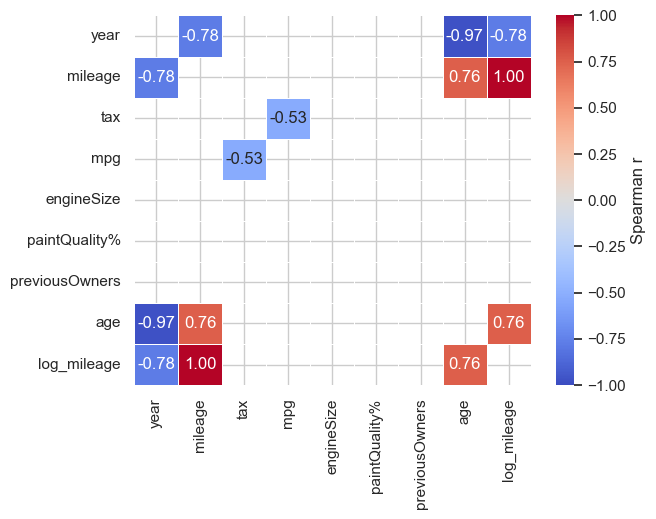

In [49]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
# show correlation for the numeric variables

thr = 0.4 # only show above this degree of correlation
M = cor_spearman           

mask = M.abs() < thr        # True => hide |r| < 0.4
mask.values[range(len(M)), range(len(M))] = True  # optional: hide diagonal

sns.heatmap(M, mask=mask, vmin=-1, vmax=1, center=0,
            cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=.5, linecolor="white",
            cbar_kws={"label": "Spearman r"})


In [50]:
# check if we should keep the categorical variables
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) # 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)



In [51]:
for var in X_train_cat:
    TestIndependence(X_train_cat[var],y_train, var)





Brand is IMPORTANT for Prediction
model is IMPORTANT for Prediction
transmission is IMPORTANT for Prediction
fuelType is IMPORTANT for Prediction
hasDamage is NOT an important predictor. (Discard hasDamage from model)


In [52]:
#Categorical Data
cat_features = ['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

#Results from Chi-Square
chi_square_results = {
    'Brand': 'Keep',
    'model': 'Keep',
    'transmission': 'Keep',
    'fuelType': 'Keep',
    'hasDamage': 'Discard'
}

categorical_table = pd.DataFrame({
    'Categorical Variable': cat_features,
    'Chi-Square': [chi_square_results[f] for f in cat_features]
})

display(categorical_table.style.hide(axis="index"))

Categorical Variable,Chi-Square
Brand,Keep
model,Keep
transmission,Keep
fuelType,Keep
hasDamage,Discard


# 4.4 Feature Selection Num <a class="anchor" id="4.4-featurenum"></a>

In [53]:
alphas = np.unique(np.r_[np.logspace(-3, 3, 25)])  # so we test a lot of alphas
base = RidgeCV(alphas=alphas, cv=5) # model to use with cross validation

nof_list = np.arange(1, X_train_num_scaled.shape[1] + 1)

best_val = -np.inf
best_n = None
best_rfe = None
best_model = None

train_score_list = []
val_score_list = []

for n in nof_list:
    rfe = RFE(estimator=base, n_features_to_select=n, step=1) # use rfe to check
    Xtr_sel = rfe.fit_transform(X_train_num_scaled, y_train)
    Xva_sel = rfe.transform(X_val_num_scaled)

    base.fit(Xtr_sel, y_train)  # RidgeCV chooses alpha via inner CV
    tr = base.score(Xtr_sel, y_train)
    va = base.score(Xva_sel, y_val)

    train_score_list.append(tr)
    val_score_list.append(va)

    if va > best_val:
        best_val = va
        best_n = n
        best_rfe = rfe
        best_model = RidgeCV(alphas=alphas, cv=5).fit(Xtr_sel, y_train)

print(f"Optimum number of features: {best_n}")
print(f"Best validation R² with {best_n} features: {best_val:.2f}")

# Inspect selected features 
selected_mask = best_rfe.support_
selected_cols = X_train_num_scaled.columns[selected_mask]


print("Selected features:", len(selected_cols))
print("Top features:", list(selected_cols))



Optimum number of features: 9
Best validation R² with 9 features: 0.70
Selected features: 9
Top features: ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'age', 'log_mileage']


In [54]:
# using lasso to check if we should use which numerical variables
reg = LassoCV()
reg.fit(X_train_num_scaled, y_train)
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
coef

year              2900.804676
mileage           -924.134509
tax               -621.982948
mpg              -1378.016810
engineSize        5883.739046
paintQuality%      -18.946799
previousOwners      -0.000000
age                  0.000000
log_mileage      -1934.292936
dtype: float64

In [55]:
#Numerical Data
num_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'age', 'log_mileage']

#Results
spearman_keep = ['tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners'] #age and log_mileage: corr -0.78
rfe_lr_keep = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'age', 'log_mileage'] #keep all
lasso_keep = ['tax', 'mpg', 'engineSize', 'paintQuality%', 'year', 'log_mileage', 'mileage'] #previousOwners: coef 0 

def decision(var, kept_list):
    return "Keep" if var in kept_list else "Discard"

table = pd.DataFrame({
    'Numeric Variable': num_features,
    'Spearman': [decision(f, spearman_keep) for f in num_features],
    'RFE LR': [decision(f, rfe_lr_keep) for f in num_features],
    'Lasso': [decision(f, lasso_keep) for f in num_features],
})

#Suggestion: 3 keep's = keep, 2 discards's = discard, otherwise try both ways
def what_to_do(row):
    keep_count = sum(v == "Keep" for v in row[1:])
    if keep_count == 3:
        return "Include"
    elif keep_count == 2:
        return "Try with and without"
    else:
        return "Discard"

table["What to do?"] = table.apply(what_to_do, axis=1)
display(table.style.hide(axis="index"))

####### correct spearman


Numeric Variable,Spearman,RFE LR,Lasso,What to do?
year,Discard,Keep,Keep,Try with and without
mileage,Discard,Keep,Keep,Try with and without
tax,Keep,Keep,Keep,Include
mpg,Keep,Keep,Keep,Include
engineSize,Keep,Keep,Keep,Include
paintQuality%,Keep,Keep,Keep,Include
previousOwners,Keep,Keep,Discard,Try with and without
age,Discard,Keep,Discard,Discard
log_mileage,Discard,Keep,Keep,Try with and without


# 4.5. Final Feature Selection <a class="anchor" id="45-finalfeature"></a>

In [56]:
X_train_num_scaled = X_train_num_scaled.drop(['age', 'mileage'], axis = 1) # using what we saw
X_val_num_scaled = X_val_num_scaled.drop(['age', 'mileage'], axis = 1) # using what we found out

# 4.6. One-hot encoding <a class="anchor" id="46-encoding"></a>

In [57]:
### One hot encoding categorical variables to include in the model, how to deal categorical variables for the model
X_train_cat.drop(['hasDamage'], axis = 1, inplace = True)
X_val_cat.drop(['hasDamage'], axis = 1, inplace = True)
one_encoding_train = pd.get_dummies(X_train_cat, drop_first = False, prefix_sep = '=')
one_encoding_val = pd.get_dummies(X_val_cat, drop_first = False, prefix_sep = '=')
one_encoding_val = one_encoding_val.reindex(columns=one_encoding_train.columns, fill_value=0)
X_train_prepared = pd.concat([X_train_num_scaled.reset_index(drop = True),
                         one_encoding_train.reset_index(drop = True)], axis = 1)
X_val_prepared = pd.concat([X_val_num_scaled.reset_index(drop = True),
                         one_encoding_val.reset_index(drop = True)], axis = 1)
X_train_prepared.shape
X_val_prepared.shape

(22792, 261)

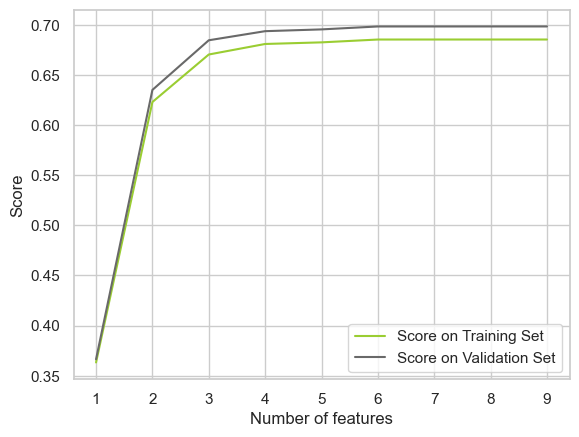

In [58]:
plt.plot(list(range(1,10)), train_score_list, label="Score on Training Set", color='yellowgreen')
plt.plot(list(range(1,10)), val_score_list, label="Score on Validation Set", color='dimgray')
plt.xlabel("Number of features")
plt.ylabel("Score")
plt.legend()
plt.show()

# 4.7  Start modelling <a class="anchor" id="47-modelling"></a>

In [59]:
# Create Lasso regression model
lasso_model = Lasso(alpha=1.0, max_iter=10000) 


# Fit the model
lasso_model.fit(X_train_prepared, y_train)

# Make predictions
y_pred_lasso_train = lasso_model.predict(X_train_prepared)
y_pred_lasso_val = lasso_model.predict(X_val_prepared)

# Evaluate the model
print("Lasso Regression Results:")
print(f"Training R²: {r2_score(y_train, y_pred_lasso_train):.4f}")
print(f"Validation R²: {r2_score(y_val, y_pred_lasso_val):.4f}")
print(f"Training MAE: {mean_absolute_error(y_train, y_pred_lasso_train):.2f}")
print(f"Validation MAE: {mean_absolute_error(y_val, y_pred_lasso_val):.2f}")
print(f"\nIntercept: {lasso_model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(X_train_prepared.columns, lasso_model.coef_):
    print(f"  {feature}: {coef:.4f}")

Lasso Regression Results:
Training R²: 0.8442
Validation R²: 0.8413
Training MAE: 2402.36
Validation MAE: 2418.47

Intercept: 16150.60
Coefficients:
  year: 2624.1975
  tax: -645.8480
  mpg: -1158.7315
  engineSize: 2888.8114
  paintQuality%: -16.8003
  previousOwners: 7.3842
  log_mileage: -2420.3163
  Brand=Audi: 6424.5085
  Brand=BMW: 7699.8201
  Brand=Ford: -0.0000
  Brand=Hyundai: -1420.5137
  Brand=Mercedes: 4668.4049
  Brand=Opel: -2865.6057
  Brand=Skoda: -805.8273
  Brand=Toyota: -0.0000
  Brand=Volkswagen: 969.4242
  model=1 Series: -7451.6368
  model=2 Series: -7607.7496
  model=200: -0.0000
  model=230: -0.0000
  model=3 Series: -5455.0811
  model=4 Series: -5566.4286
  model=5 Series: -3689.8651
  model=6 Series: -3496.2988
  model=7 Series: 1798.1866
  model=8 Series: 23392.7213
  model=A Class: -1269.0354
  model=A1: -5139.5661
  model=A2: -0.0000
  model=A3: -3602.6161
  model=A4: -3506.5020
  model=A5: -2108.4033
  model=A6: -1648.3728
  model=A7: -277.0268
  model=A8:

In [60]:
# We opted to use lasso at this step of the process as it deals partially with multicolinearity and helps with feature selection, in the future we will try differnet ones

In [61]:
# to evaluate the model we will focus mainly on MAE as the lower it gets the closer we are from reaching the right price for the cars

# 5. Test  <a class="anchor" id="5-test"></a>

In [62]:
test = pd.read_csv('test.csv')

# 5.1 Preproess Test <a class="anchor" id="51-preprocesstest"></a>

In [63]:
test['Brand'] = clean_categorical(test['Brand'], brand_mapping)
test['Brand'].unique()

array(['Hyundai', 'Volkswagen', 'BMW', 'Opel', 'Ford', 'Mercedes',
       'Skoda', 'Toyota', 'Audi', nan, 'M'], dtype=object)

In [64]:
test =match_car_models_df(
    test,
    model_column='model',
    brand_column='Brand',
    model_to_brand=model_to_brand,
    misspelling_corrections=misspelling_model_corrections,
    unknown_models=unknown_models
)
test = clean_vehicle_dataframe(test)

Debug: Unmatched models after cleaning: {'iq', 'rav4', '4 series', 'fox', 'supra', 'focus', 'combo life', 't-cross', 'x3', 'c-h', 'b-max', 'kona', 'a7', 'sl class', 'm6', 'puma', 't-roc', 'beetle', 'zafira tourer', 'r class', 'california', 'x6', 'fusion', 's class', 'i10', 'a5', 'tt', 'scirocco', 'kamiq', 'q2', 'gt86', 'c class', 'r8', 'x4', 'sq7', 'jetta', 'arteon', 'x5', 'land cruiser', 'i40', 'gla class', 'passat', 'fiesta', 'astra', 'gl class', 'i800', 'transit tourneo', 'tourneo connect', 'i20', '180', 'c-hr', 'sq5', 'superb', 's4', 'golf sv', 'tigra', 'a3', 'q3', 'fabia', 'cc', 'yeti outdoor', 'i8', 'amica', 'polo', 'x7', 'x-class', 'a6', 'g clas', 'rs6', 'santa fe', 'corolla', 'yeti', 'agila', 'a class', 'g class', 'gle class', 's5', 'hilux', 'glb class', 'ka', 'pum', 'clc class', 'c-max', 'm5', 'z4', 'a4', 'prius', 'proace verso', 'roomster', 'b class', 'vivaro', 'sharan', 'm4', 'caddy', '7 series', 'ka+', '3 series', 'verso', 'edge', 'mustang', 'tucson', 'amarok', 'kuga', 'ayg

In [65]:
clean_max_paintquality = test['paintQuality%'] > 100
test.loc[clean_max_paintquality, 'paintQuality%'] = 100
clean_fueltype = test['fuelType'] == 'Other'
test.loc[clean_fueltype, 'fuelType'] = np.nan
test['year'] = np.floor(test['year'])
clean_engine_size = test['engineSize'] == 0
test.loc[clean_engine_size, 'engineSize'] = np.nan
test.set_index('carID', inplace = True)
ref_year = 2024
test['age'] = ref_year - test['year']
test['log_mileage'] = np.log(test['mileage'])
test['hasDamage'] = test['hasDamage'].fillna(1)

In [66]:
test = fill_brand_using_train_maps(test,
                                      by_model_transmission_year_clean_brand,
                                      by_model_transmission_clean_brand,
                                      by_year_transmission_clean_brand, by_transmission_clean_brand, by_year_clean_brand)
test = fill_model_using_train_maps(test, by_brand_year_clean_model, by_brand_clean_model)
test = fill_year_using_train_maps(test, by_brand_model_clean_year)
test = fill_transmission_using_train_maps(test, by_brand_model_year_clean_transmission, by_brand_model_clean_transmission)
test = fill_mileage_using_train_maps(test, by_year_clean_mileage, by_brand_clean_mileage)
test = fill_fuelType_using_train_maps(test, by_brand_model_year_clean_fuelType, by_brand_model_clean_fuelType, by_brand_clean_fuelType)
test = fill_tax_using_train_maps(test, by_brand_model_year_clean_tax, by_brand_model_clean_tax, by_brand_clean_tax)
test = fill_mpg_train_maps(test, by_brand_model_year_clean_mileage, by_brand_model_clean_mileage)
test = fill_engineSize_using_train_maps(test, by_brand_model_year_clean_engineSize, by_brand_model_clean_engineSize, by_brand_clean_engineSize)
test = fill_paintQuality_using_train_maps(test, by_brand_model_year_clean_paintQuality, by_brand_model_clean_paintQuality, by_brand_clean_paintQuality, by_model_clean_paintQuality)
test = fill_previousOwners_train_maps(test, by_brand_model_year_clean_previousOwners, by_brand_model_clean_previousOwners, by_brand_clean_previousOwners)
test = clean_age(test)
test = clean_log_mileage(test)


In [67]:
test.drop('brand_match', axis = 1, inplace = True)
num_cols = test.select_dtypes(include=[np.number]).columns
non_num_cols = [c for c in test.columns if c not in num_cols]

for col in non_num_cols:
    test[col] = test[col].astype('category')
test.info()


test_num = test.select_dtypes(include=[np.number]).set_index(test.index)
test_cat =  test.select_dtypes(exclude=[np.number]).set_index(test.index)
test_num.drop('hasDamage', axis = 1, inplace = True)
test_cat['hasDamage'] = test['hasDamage']
test_cat
test_num_scaled = scaler.transform(test_num)
test_num_scaled = pd.DataFrame(test_num_scaled, columns = test_num.columns).set_index(test_num.index)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32567 entries, 89856 to 99627
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           32567 non-null  category
 1   model           32567 non-null  category
 2   year            32567 non-null  float64 
 3   transmission    32567 non-null  category
 4   mileage         32567 non-null  float64 
 5   fuelType        32567 non-null  category
 6   tax             32567 non-null  float64 
 7   mpg             32567 non-null  float64 
 8   engineSize      32567 non-null  float64 
 9   paintQuality%   32567 non-null  float64 
 10  previousOwners  32567 non-null  float64 
 11  hasDamage       32567 non-null  float64 
 12  age             32567 non-null  float64 
 13  log_mileage     32567 non-null  float64 
dtypes: category(4), float64(10)
memory usage: 2.9 MB


In [68]:
one_encoding_test = pd.get_dummies(test_cat, drop_first = False, prefix_sep = '=')
one_encoding_test = one_encoding_test.reindex(columns=one_encoding_train.columns, fill_value=0)
test_prepared = pd.concat([test_num_scaled.reset_index(drop = True),
                         one_encoding_test.reset_index(drop = True)], axis = 1)
test_prepared = test_prepared.drop(['age', 'mileage'], axis = 1)

# 5.2  Prediction on Test <a class="anchor" id="52-prediction"></a>

In [69]:
Y_prediction = lasso_model.predict(test_prepared)
len(Y_prediction)

32567

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

rf = RandomForestRegressor(
    n_estimators=500,      # trees
    max_depth=None,        # let trees grow until pure/leaves small
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',   # good default for RF
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_prepared, y_train)

pred_val = rf.predict(X_val_prepared)
r2  = r2_score(y_val, pred_val)
mae = mean_absolute_error(y_val, pred_val)
print(f"Validation R²: {r2:.3f} | MAE: {mae:,.0f}")


Validation R²: 0.940 | MAE: 1,397


In [71]:
Y_prediction = rf.predict(test_prepared)

In [72]:
from sklearn.model_selection import KFold, RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    "n_estimators": randint(300, 1200),
    "max_depth": randint(6, 40),            # try deeper if data is complex
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", 0.3, 0.5, None],
    "bootstrap": [True, False],
    # Optional speed-up via subsampling when bootstrap=True:
    # "max_samples": uniform(0.6, 0.35)     # samples per tree (0.6–0.95)
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

rf_base = RandomForestRegressor(
    n_jobs=-1,
    random_state=42
)

search = RandomizedSearchCV(
    rf_base,
    param_distributions=param_dist,
    n_iter=40,                               # adjust for time budget
    scoring="neg_mean_absolute_error",       # MAE is intuitive for prices
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

search.fit(X_train_prepared, y_train)
best_rf = search.best_estimator_

pred_val = best_rf.predict(X_val_prepared)   
r2  = r2_score(y_val, pred_val)
mae = mean_absolute_error(y_val, pred_val)
print("Best params:", search.best_params_)
print(f"Tuned Validation R²: {r2:.3f} | MAE: {mae:,.0f}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'bootstrap': False, 'max_depth': 32, 'max_features': 0.3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 912}
Tuned Validation R²: 0.948 | MAE: 1,323


In [73]:
sub = pd.read_csv("sample_submission.csv")
id_col, target_col = sub.columns
submission = pd.DataFrame({
    id_col: test.index,          # car IDs from the index
    target_col: Y_prediction.ravel()     
})

submission.to_csv("my_submission.csv", index=False)
print(submission.head())
submission.to_csv("my_submission.csv", index=False)


    carID      price
0   89856  14393.856
1  106581  23030.264
2   80886  13802.882
3  100174  16944.882
4   81376  24107.396


In [74]:
#EU

In [75]:
#Limpar a coluna transmission no test_cat
test_cat['transmission'] = (test_cat['transmission'].str.strip())
print(test_cat['transmission'].unique())

['Automatic' 'Semi-Auto' 'Manual' 'Unknown' 'Other']


In [82]:
#Combinar train e val
X_full = pd.concat([X_train_prepared, X_val_prepared])
y_full = pd.concat([y_train, y_val])

#Treinar o modelo final com os melhores hiperparâmetros
final_rf = RandomForestRegressor(
    n_estimators=912,
    max_depth=32,
    max_features=0.3,
    min_samples_split=4,
    min_samples_leaf=1,
    bootstrap=False,
    n_jobs=-1,
    random_state=42
)

final_rf.fit(X_full, y_full)


RandomForestRegressor(bootstrap=False, max_depth=32, max_features=0.3,
                      min_samples_split=4, n_estimators=912, n_jobs=-1,
                      random_state=42)

In [83]:
Y_prediction = final_rf.predict(test_prepared)
sub = pd.read_csv("sample_submission.csv")
id_col, target_col = sub.columns

submission = pd.DataFrame({
    id_col: test.index,          # IDs do test
    target_col: Y_prediction.ravel()
})

submission.to_csv("my_submission.csv", index=False)
print(submission.head())

    carID         price
0   89856  16115.870113
1  106581  22263.579700
2   80886  13654.832208
3  100174  17185.502400
4   81376  24354.078272


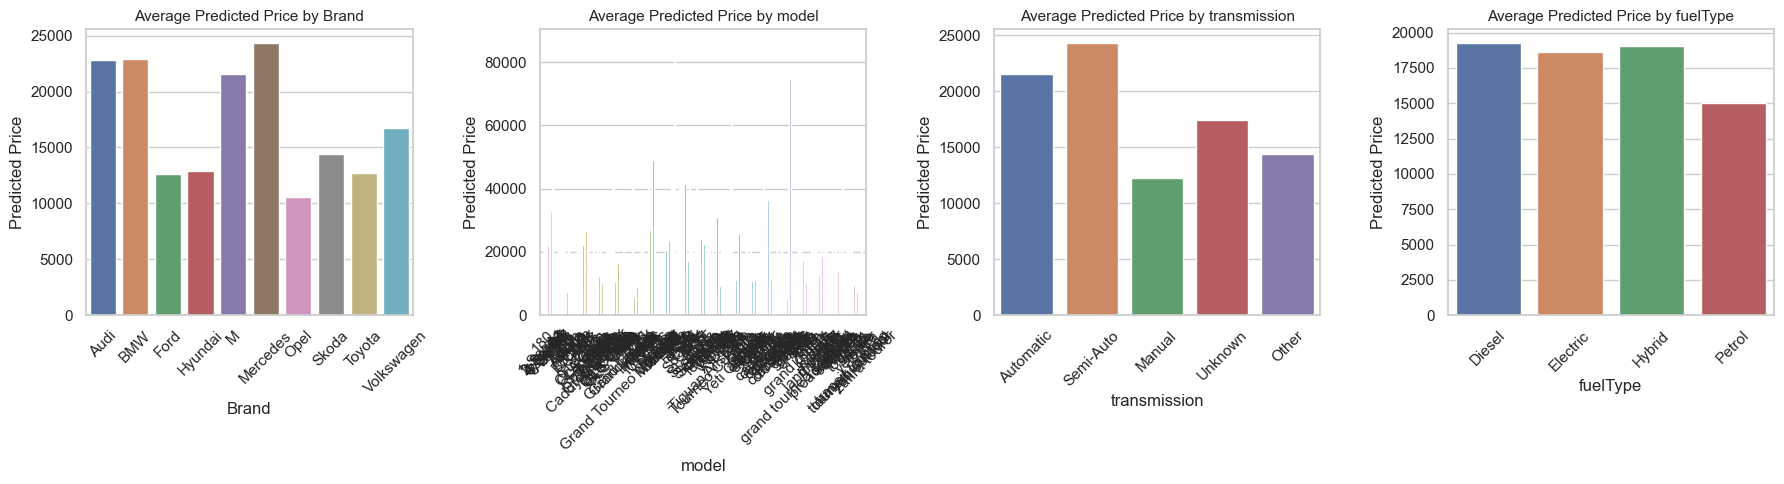

In [ ]:
#Só para visualizar
cat_vars = ['Brand', 'model', 'transmission', 'fuelType']

fig, axes = plt.subplots(1, len(cat_vars), figsize=(18, 5))
axes = axes.flatten()

for i, var in enumerate(cat_vars):
    sns.barplot(x=test_cat[var], y=Y_prediction, ax=axes[i], estimator='mean', errorbar=None)
    axes[i].set_title(f"Average Predicted Price by {var}", fontsize=11)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Predicted Price")

plt.tight_layout()
plt.show()

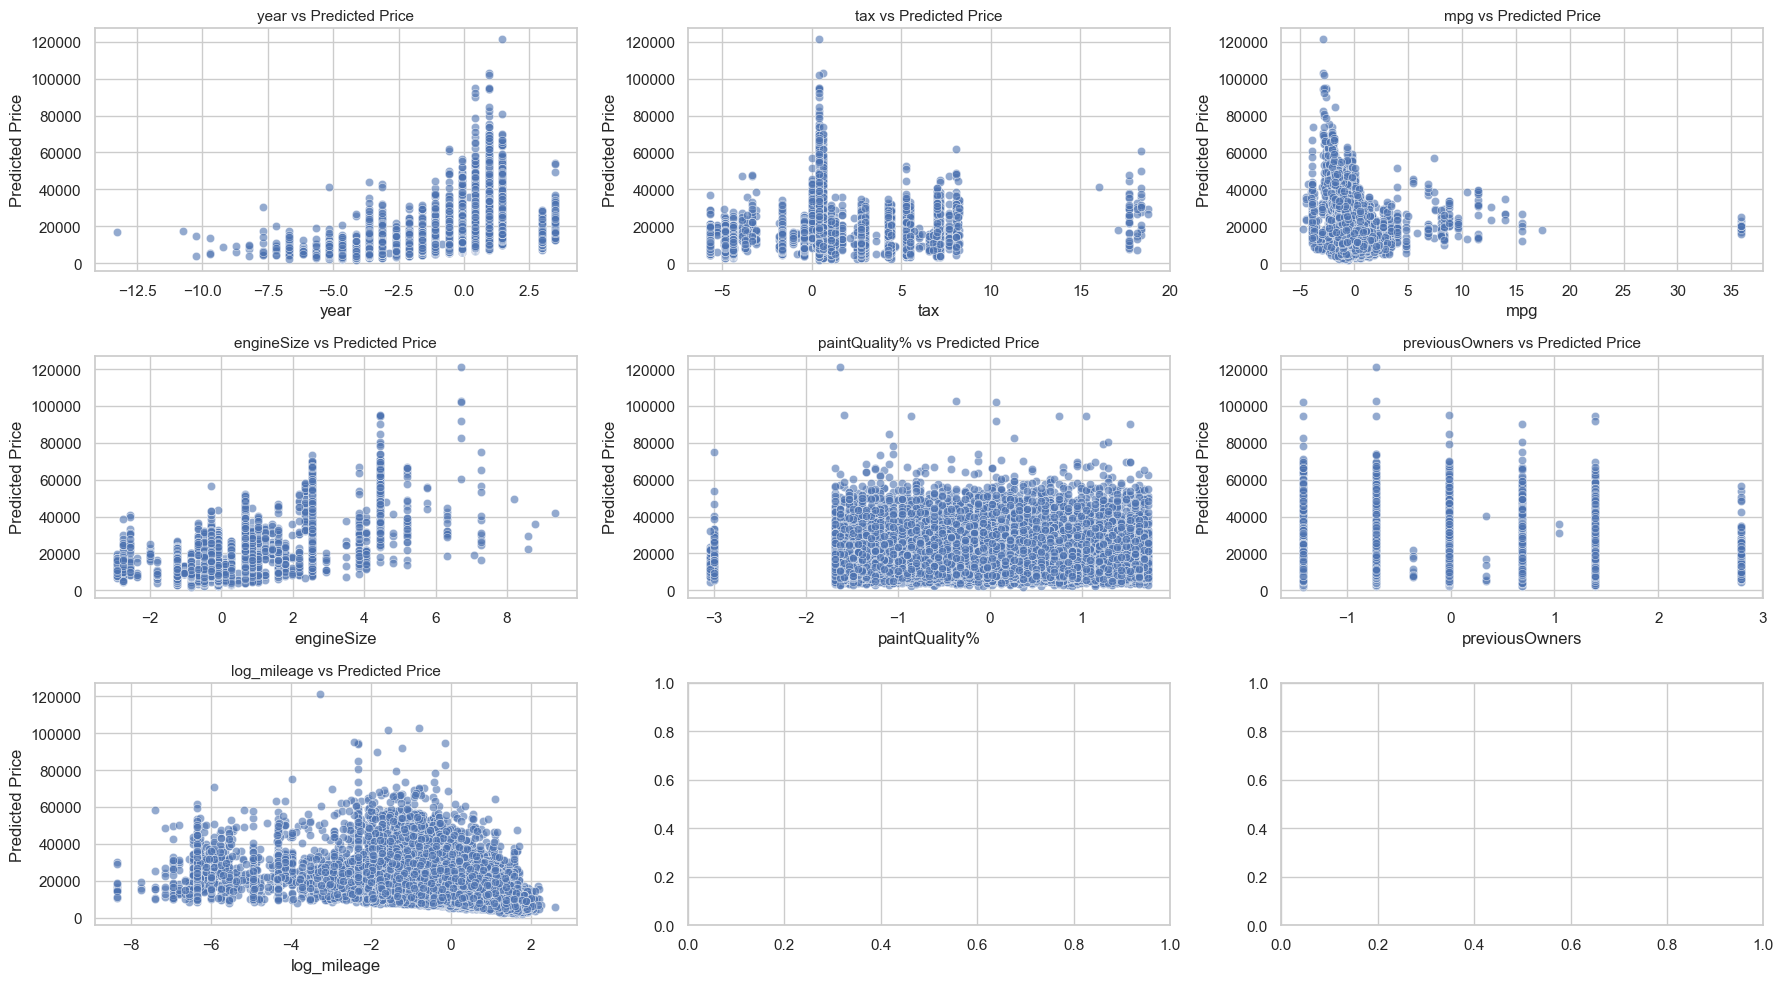

In [78]:
num_vars = ['year', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'log_mileage']

n_cols = 3
n_rows = (len(num_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(x=test_prepared[var], y=Y_prediction, ax=axes[i], alpha=0.6)
    axes[i].set_title(f"{var} vs Predicted Price", fontsize=11)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Predicted Price")

plt.tight_layout()
plt.show()

In [ ]:
#Insights: -> refazer o modelo com estas alterações para ver se melhora
#maybe year should be log_year
#maybe engineSize should be log_engineSize

In [ ]:
#Linear Regression: OLS (sklearn), Ridge, Lasso, Elastic Net
#OLS (sklearn)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

lin_model = LinearRegression()
lin_model.fit(X_train_prepared, y_train)

y_pred_train = lin_model.predict(X_train_prepared)
y_pred_val = lin_model.predict(X_val_prepared)

#Ridge Regression
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_prepared, y_train)

y_pred_ridge_train = ridge_model.predict(X_train_prepared)
y_pred_ridge_val = ridge_model.predict(X_val_prepared)

#Lasso Regression
lasso_model = Lasso(alpha=1.0, max_iter=10000)
lasso_model.fit(X_train_prepared, y_train)

y_pred_lasso_train = lasso_model.predict(X_train_prepared)
y_pred_lasso_val = lasso_model.predict(X_val_prepared)

#Elastic Net
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
elastic_model.fit(X_train_prepared, y_train)

y_pred_elastic_train = elastic_model.predict(X_train_prepared)
y_pred_elastic_val = elastic_model.predict(X_val_prepared)

comparison = pd.DataFrame({
    'Model': ['OLS (sklearn)', 'Ridge', 'Lasso', 'Elastic Net'],
    'Train R²': [
        r2_score(y_train, y_pred_train),
        r2_score(y_train, y_pred_ridge_train),
        r2_score(y_train, y_pred_lasso_train),
        r2_score(y_train, y_pred_elastic_train)
    ],
    'Val R²': [
        r2_score(y_val, y_pred_val),
        r2_score(y_val, y_pred_ridge_val),
        r2_score(y_val, y_pred_lasso_val),
        r2_score(y_val, y_pred_elastic_val)
    ],
    'Train MAE': [
        mean_absolute_error(y_train, y_pred_train),
        mean_absolute_error(y_train, y_pred_ridge_train),
        mean_absolute_error(y_train, y_pred_lasso_train),
        mean_absolute_error(y_train, y_pred_elastic_train)
    ],
    'Val MAE': [
        mean_absolute_error(y_val, y_pred_val),
        mean_absolute_error(y_val, y_pred_ridge_val),
        mean_absolute_error(y_val, y_pred_lasso_val),
        mean_absolute_error(y_val, y_pred_elastic_val)
    ]
})

print("\nModel Comparison:")
comparison


Model Comparison:


,Model,Train R²,Val R²,Train MAE,Val MAE
0,OLS (sklearn),0.846641,-2.087300e+20,2372.278483,1.516552e+12
1,Ridge,0.846420,8.433544e-01,2375.083548,2.396837e+03
2,Lasso,0.844205,8.412737e-01,2402.357270,2.418469e+03
3,Elastic Net,0.681365,6.954582e-01,3359.931286,3.321171e+03
